In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [317]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [139]:
customer = pd.read_excel('Customer_v2.xlsx')

In [3]:
reviews = pd.read_excel('Reviews.xlsx')

In [4]:
sales_train = pd.read_excel('Sales.xlsx', sheet_name='Train')

In [5]:
sales_test = pd.read_excel('Sales.xlsx', sheet_name='Test')

In [6]:
customer.columns

Index(['CustomerID', 'BookCode', 'Age'], dtype='object')

In [141]:
customer.dtypes

CustomerID     int64
BookCode      object
Age            int64
dtype: object

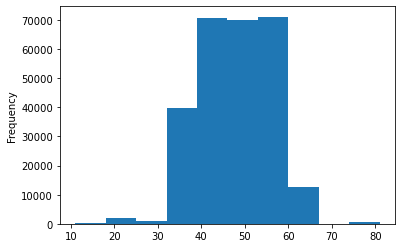

In [140]:
customer['Age'].plot(kind='hist')

In [208]:
book_list = list(reviews['BookCode'].unique())
books = list(map(str,book_list))

In [217]:
customer_unique = customer.loc[customer['BookCode'].isin(books)]

In [227]:
reviews_unique = reviews.loc[reviews['BookCode'].isin(books)]

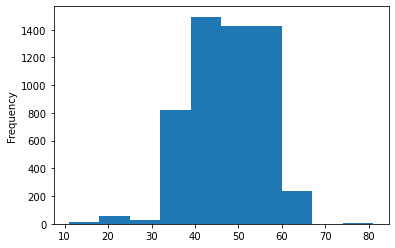

In [219]:
customer_unique['Age'].plot(kind='hist')

In [34]:
sales_test.columns

Index(['Available Books in the shelf', 'Price', 'State', 'Time', 'Week',
       'NewYear', 'MLK', 'Presidents', 'GoodFriday', 'Memorial',
       'Independence', 'Labor', 'Thanksgiving', 'Christmas', 'BookCode'],
      dtype='object')

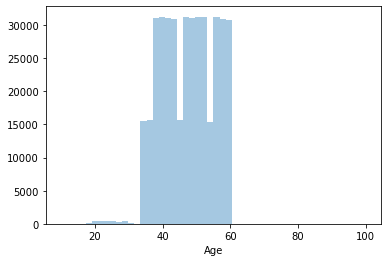

In [43]:
sns.distplot(customer.Age, kde=False)
plt.show()

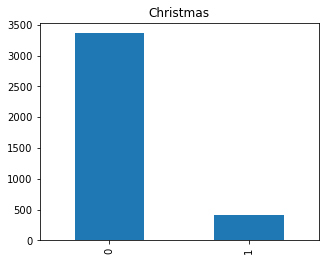

In [46]:
sales_test['Christmas'].value_counts().plot.bar(figsize=(5,4),title='Christmas')

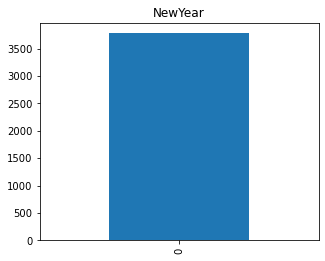

In [47]:
sales_test['NewYear'].value_counts().plot.bar(figsize=(5,4),title='NewYear')

In [59]:
df = sales_test.copy()

In [65]:
binInterval = [0.6, 1.2, 1.8]
binLabels   = [1,2,3]
df['binned'] = pd.cut(df['Price'], bins = binInterval)

<Figure size 720x576 with 0 Axes>

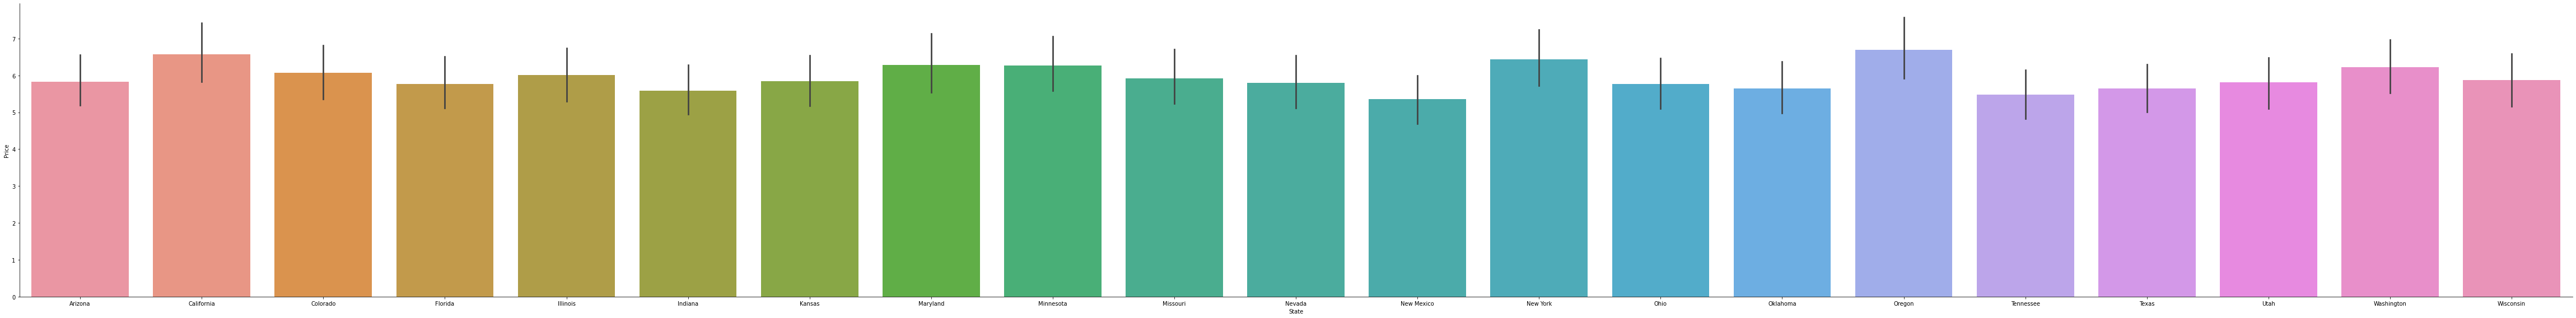

In [70]:
plt.figure(figsize=(10,8))
sns.catplot('State','Price', data=sales_test,kind='bar',aspect=8, height = 8)


<Figure size 720x576 with 0 Axes>

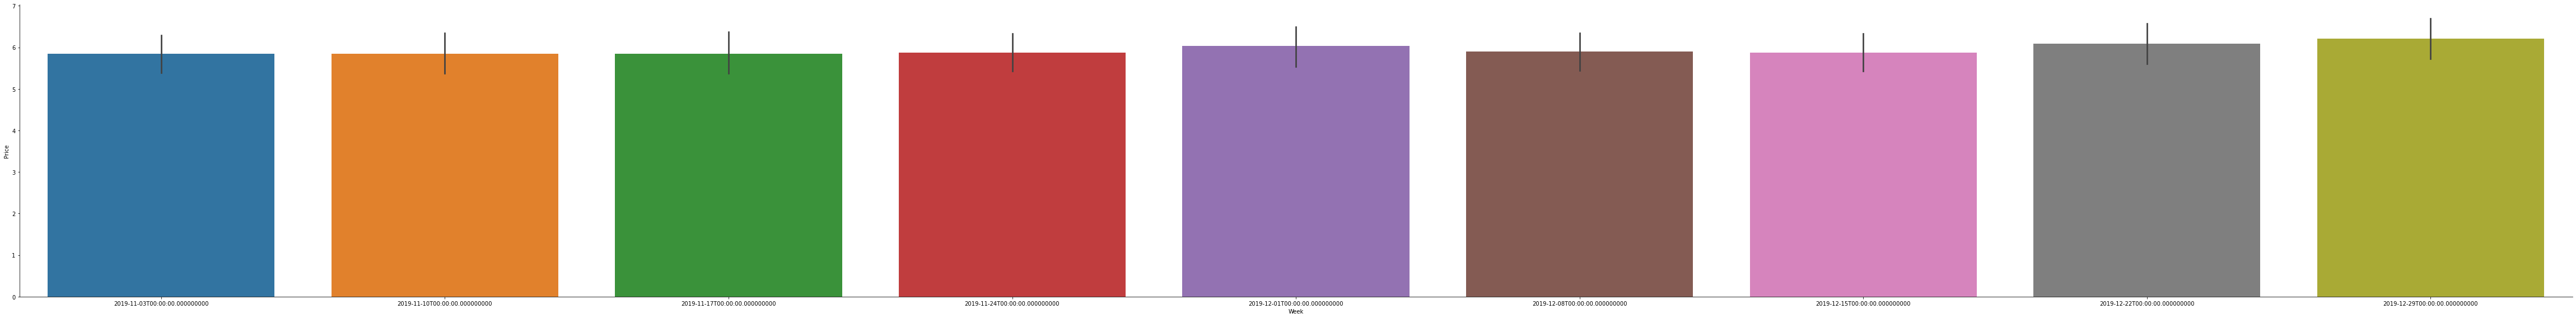

In [71]:
plt.figure(figsize=(10,8))
sns.catplot('Week','Price', data=sales_test,kind='bar',aspect=8, height = 8)


<Figure size 720x576 with 0 Axes>

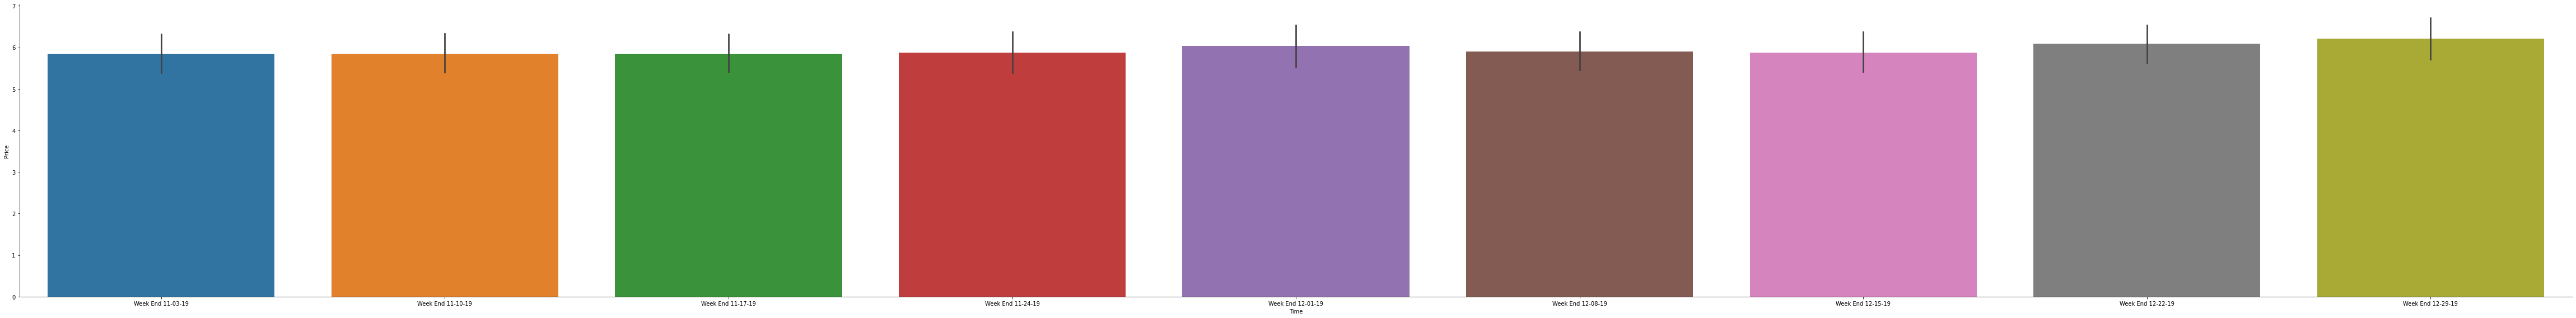

In [72]:
plt.figure(figsize=(10,8))
sns.catplot('Time','Price', data=sales_test,kind='bar',aspect=8, height = 8)


In [85]:
train = sales_train.copy()
train.drop(['BookCode'],axis=1,inplace=True)

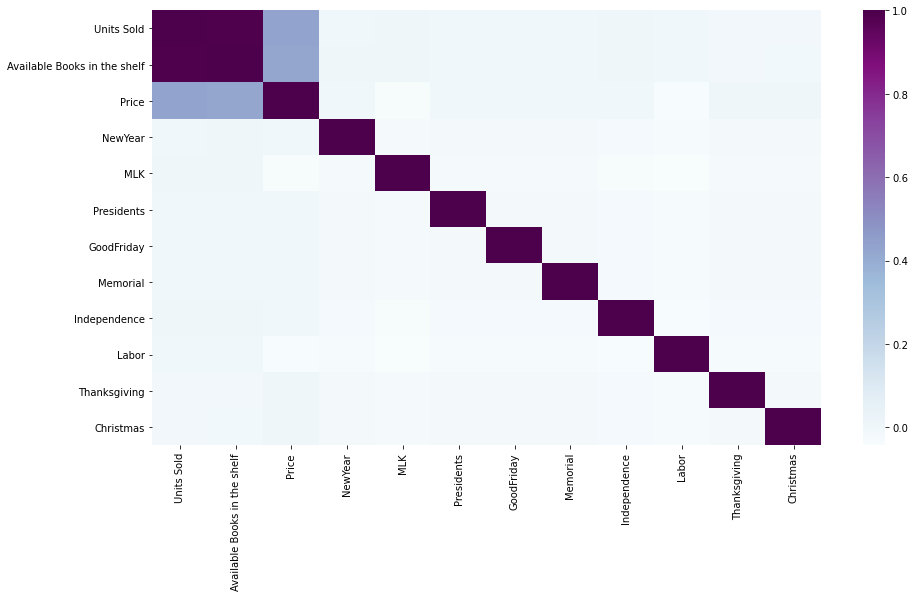

In [86]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(matrix,vmax=1,cmap="BuPu")

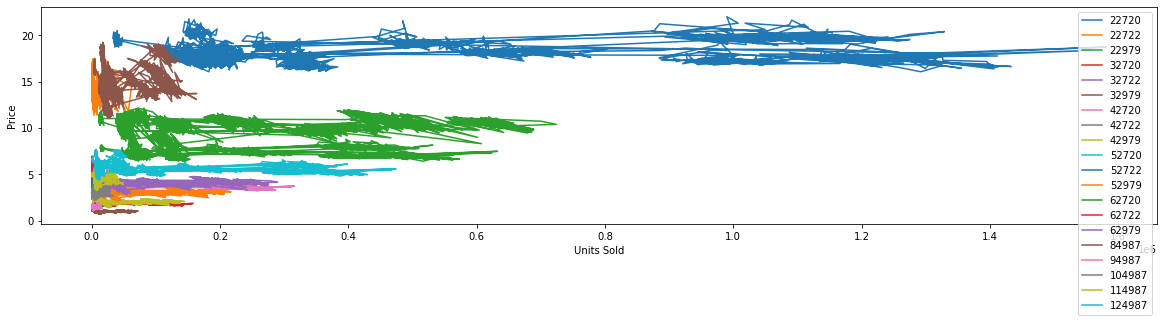

In [95]:
fig, ax = plt.subplots(figsize=(20,4))
for key, grp in sales_train.groupby(['BookCode']):
    ax.plot( grp['Units Sold'],grp['Price'], label=key)
plt.xlabel("Units Sold")
plt.ylabel("Price")
ax.legend()
plt.show()

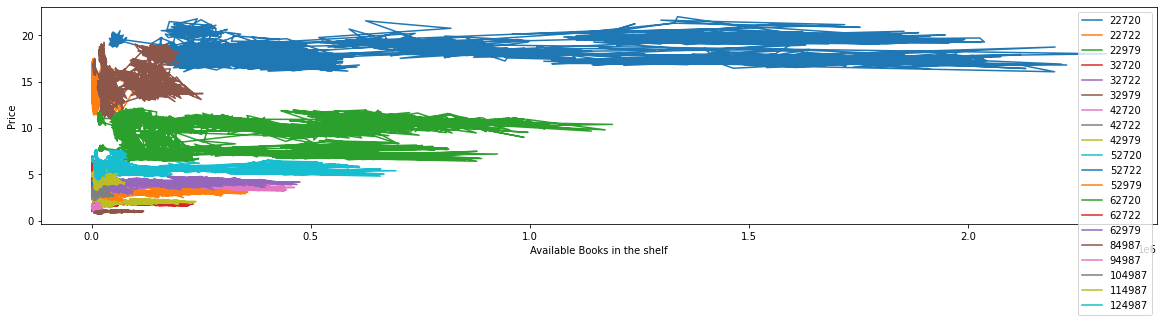

In [97]:
fig, ax = plt.subplots(figsize=(20,4))
for key, grp in sales_train.groupby(['BookCode']):
    ax.plot( grp['Available Books in the shelf'],grp['Price'], label=key)
plt.xlabel('Available Books in the shelf')
plt.ylabel("Price")
ax.legend()
plt.show()

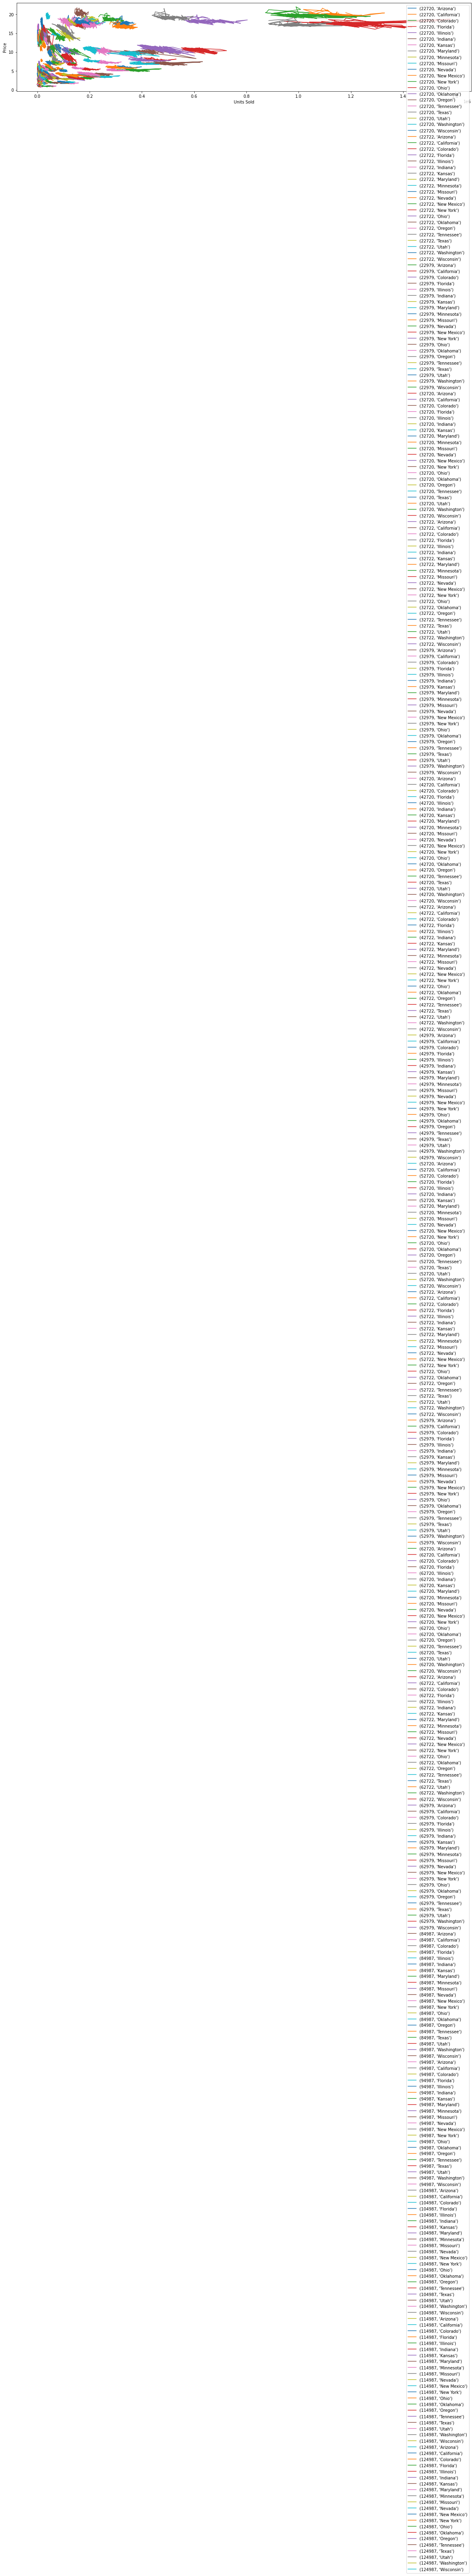

In [98]:
fig, ax = plt.subplots(figsize=(20,4))
for key, grp in sales_train.groupby(['BookCode','State']):
    ax.plot( grp['Units Sold'],grp['Price'], label=key)
plt.xlabel("Units Sold")
plt.ylabel("Price")
ax.legend()
plt.show()

In [104]:
books_unique = reviews['BookCode'].unique()

In [117]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

def display_wordCloud(train, title = None):
    wordcloud = WordCloud(background_color = 'black',
                         stopwords = stopwords,
                         max_words = 200,
                         max_font_size = 40,
                         scale = 3,
                         random_state = 1).generate(str(train))
    fig = plt.figure(1,figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

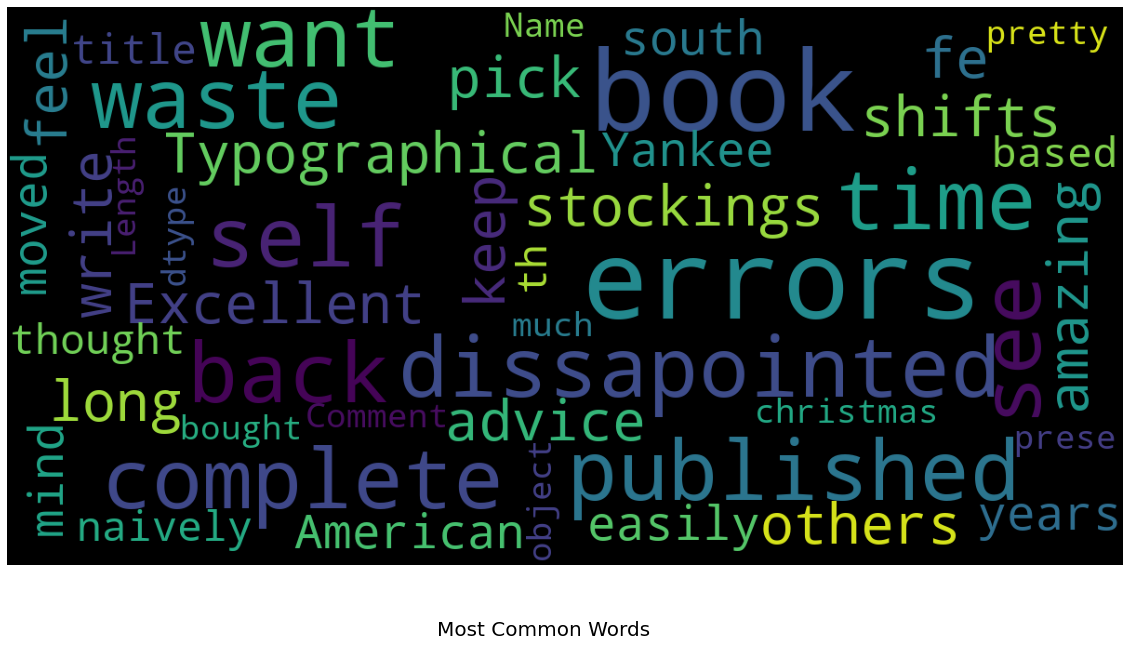

In [247]:
display_wordCloud(reviews_unique['Comment'],'Most Common Words ')

In [116]:
reviews.columns

# Basic Pre-processing

In [120]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [121]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
replace_contractions("this's a text with contraction")

'this is a text with contraction'

In [122]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'm' ,'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'hi', 'hello','he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [225]:
from nltk.stem import  SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer

def stem_text(text):
    tokenizer = ToktokTokenizer()
    stemmer = SnowballStemmer('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)


In [221]:
from bs4 import BeautifulSoup
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DuttaAnn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [245]:
# Cleaning Texts of Train Dataset

# Combining all the above stundents 
from tqdm import tqdm
text = []
# tqdm is for printing the status bar
for sentance in tqdm(reviews_unique['Comment'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = replace_contractions(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = lemma_text(sentance)
    sentance = stem_text(sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    text.append(sentance.strip())
#     print(sentance)

 98%|███████████████████████████████████████████████████████████████████████▊ | 110945/112732 [06:27<00:06, 255.80it/s]C:\Users\DuttaAnn\Anaconda3\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "............ ..... ..... ...... ...... ....... ..... ....... ....... ........ ......... ........ ........ ..... ......... ..... ..... ...... .. ......" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████| 112732/112732 [06:34<00:00, 286.03it/s]


In [246]:
text

['self publish book want know whi read paragraph star review must written ms haddon famili friend perhap cannot imagin anyon read whole thing spent even book friend hyster read bit piec one anoth definit bad enough enter kind worst book contest cannot believ amazon even sell kind thing mayb offer grade term paper kill mockingbird book quit sure ms haddon never heard anyway unless mood send book someon joke stay far far away one',
 'wa dissapoint see error back cover sinc paid book read anyway say love could not put read whole book two hour say buy say read sad give interest point view church today spend much time look fault also enjoy belov sincer jaylynn r',
 'complet wast time typograph error poor grammar total pathet plot add absolut noth embarrass author veri disappoint actual paid book',
 'feel write keep wast money book seem written grader poor grammat skill age anoth review point misspel cover believ least one per chapter exampl wa mention twice lean hous wa distract poor write 

In [248]:
reviews_unique['clean_text'] = text
reviews_unique.head()

Comment  BookCode  \
0  This is a self-published book, and if you want...     52979   
1  I was a dissapointed to see errors on the back...     22722   
2  A complete waste of time. Typographical errors...     52720   
3  I feel I have to write to keep others from was...     32722   
4  Excellent stockings for long shifts on your fe...     84987   

                                          clean_text  
0  self publish book want know whi read paragraph...  
1  wa dissapoint see error back cover sinc paid b...  
2  complet wast time typograph error poor grammar...  
3  feel write keep wast money book seem written g...  
4  excel stock long shift foot not tight not loos...

## Generating Topics

In [250]:
!pip3 install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135599 sha256=53e503076c9ca59d902688b4a3ebef49eb6935c79b016b70e13682ca3693258f
  Stored in directory: c:\users\duttaann\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
Successfully built pyLDAvis


In [275]:
!pip3 install gensim

  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109637 sha256=bfc1fe7302e957bfac7793afae36d8dd1024315fd719164ba8870e6cc26d2a48
  Stored in directory: c:\users\duttaann\appdata\local\pip\cache\wheels\24\f6\ea\70a0761bdfaeacff66662751fe71920e25c4c43d97098a3886
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [276]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [277]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [279]:
# from pyLDAvis import gensim 
# import pyLDAvis.gensim
import gensim

In [280]:
processed_data = reviews_unique['clean_text'].map(preprocess)
processed_data[:10]

0    [self, publish, book, want, know, read, paragr...
1    [dissapoint, error, cover, sinc, pay, book, re...
2    [complet, wast, time, typograph, error, poor, ...
3    [feel, write, wast, money, book, write, grader...
4    [excel, stock, long, shift, foot, tight, loo, ...
5    [take, week, reciev, pair, stock, order, arriv...
6    [size, smaller, recomend, chart, sheer, guess,...
7    [steven, wardel, book, pure, delight, recommen...
8    [say, charg, on, veri, short, time, know, batt...
9    [mani, concept, digit, compress, book, easi, r...
Name: clean_text, dtype: object

In [281]:
processed_data_list = list(processed_data)

In [293]:
import spacy
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal:
# spacy.load('en')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(processed_data_list, allowed_postags=['NOUN','ADJ','VERB','ADV']) 
#select noun and verb
print(data_lemmatized[:5])

['self publish book want know read paragraph star review write haddon famili friend perhap imagin anyon read thing spend book friend hyster read piec anoth definit enter kind bad book contest believ amazon sell kind thing mayb offer grade term paper kill mockingbird book quit sure haddon hear mood send book someon joke stay away', 'dissapoint error cover sinc pay book read love read book hour read point view church today spend time look fault enjoy belov sincer jaylynn', 'complet wast time typograph error poor grammar total pathet plot absolut noth embarrass author veri disappoint actual pay book', 'feel write wast money book write grader poor grammat skill anoth review point misspel cover believ chapter exampl mention twice lean hous distract poor write weak plot decid read pencil hand mark horribl grammar spell plea wast money believ good review write author relat faith review', 'excel stock long shift foot tight loo garment integr long packag state proper care']


In [299]:
for i in data_lemmatized[:5]:
    print(i,'\n')

self publish book want know read paragraph star review write haddon famili friend perhap imagin anyon read thing spend book friend hyster read piec anoth definit enter kind bad book contest believ amazon sell kind thing mayb offer grade term paper kill mockingbird book quit sure haddon hear mood send book someon joke stay away 

dissapoint error cover sinc pay book read love read book hour read point view church today spend time look fault enjoy belov sincer jaylynn 

complet wast time typograph error poor grammar total pathet plot absolut noth embarrass author veri disappoint actual pay book 

feel write wast money book write grader poor grammat skill anoth review point misspel cover believ chapter exampl mention twice lean hous distract poor write weak plot decid read pencil hand mark horribl grammar spell plea wast money believ good review write author relat faith review 

excel stock long shift foot tight loo garment integr long packag state proper care 



In [298]:
for i in reviews_unique['clean_text'][:5]:
    print(i,'\n')

self publish book want know whi read paragraph star review must written ms haddon famili friend perhap cannot imagin anyon read whole thing spent even book friend hyster read bit piec one anoth definit bad enough enter kind worst book contest cannot believ amazon even sell kind thing mayb offer grade term paper kill mockingbird book quit sure ms haddon never heard anyway unless mood send book someon joke stay far far away one 

wa dissapoint see error back cover sinc paid book read anyway say love could not put read whole book two hour say buy say read sad give interest point view church today spend much time look fault also enjoy belov sincer jaylynn r 

complet wast time typograph error poor grammar total pathet plot add absolut noth embarrass author veri disappoint actual paid book 

feel write keep wast money book seem written grader poor grammat skill age anoth review point misspel cover believ least one per chapter exampl wa mention twice lean hous wa distract poor write weak plo

In [305]:
reviews_final = reviews_unique.drop(['Comment'],axis=1)
reviews_final.to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/cleaned_reviews.csv',index=False)

## Building Topic Model

In [306]:
#   Create the Document-Word matrix
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,# minimum reqd occurences of a word 
                             stop_words='english',# remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}', # num chars > 3
                             #max_features=50000, # max number of uniq words    
                             )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [308]:
# Build LDA model

lda_model = LatentDirichletAllocation(n_components=20,# Number of topics
                                      max_iter=10,# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,# Random state
                                      batch_size=128,# n docs in each learning iter
                                      evaluate_every = -1,# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [309]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -21576733.60316602
Perplexity:  2201.6021588675594
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [ ]:
## Grid Search to determine the best LDA model

In [310]:
# Define Search Param
search_params = {
                 'n_components': [5,7,10], 
                 'learning_decay': [.5, .3, .1]
                 }

lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

model = GridSearchCV(lda, param_grid=search_params)

model.fit(data_vectorized)
GridSearchCV(cv=None, 
             error_score='raise',
             estimator=LatentDirichletAllocation( batch_size=128,
                                            doc_topic_prior=None,
                                            evaluate_every=-1, 
                                            learning_decay=0.7,
                                            learning_method=None,
                                            learning_offset=10.0,
                                            max_doc_update_iter=100, 
                                            max_iter=10,
                                            mean_change_tol=0.001,
                                            n_components=10, 
                                            n_jobs=1,
                                            #n_topics=None, 
                                            perp_tol=0.1, 
                                            random_state=None,
                                            topic_word_prior=None, 
                                            total_samples=1000000.0, 
                                            verbose=0),
            #fit_params=None,
            iid=True,
            n_jobs=1,
            param_grid= {
                            'n_topics': [5,10,7], 
                            'learning_decay': [0.3,0.1,0.5]
                        },
            pre_dispatch='2*n_jobs', 
            refit=True, 
            return_train_score='warn',
            scoring=None,
            verbose=0)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method=None,
                                                 n_jobs=1),
             iid=True, n_jobs=1,
             param_grid={'learning_decay': [0.3, 0.1, 0.5],
                         'n_topics': [5, 10, 7]},
             return_train_score='warn')

In [311]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Best Log Likelihood Score:  -4245315.309486514
Model Perplexity:  1666.8357198756778


##Getting records from the Best Model

In [313]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ['Doc'+ str(i) for i in range(len(reviews_final))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic# Styling

def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
 
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)
    
    
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [314]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

aaron     abandon      abbey       abbi   abbrevi     abduct  \
Topic0   0.207479    0.205836   0.201110   0.201134  0.201070   0.202464   
Topic1   0.224882    0.209058   0.206845   0.208901  0.202258   0.218684   
Topic2   0.220048    0.206021   0.204420   0.203791  8.249057  17.592004   
Topic3   0.200231    0.202633   0.200837   0.201878  0.200269   0.201535   
Topic4  13.903986  147.356249  18.074703  49.238085  0.200444   0.210952   

             abel     aberr      abhor       abi  ...   zillion    ziplock  \
Topic0   0.201586  0.212904   0.200926  0.200362  ...  0.209176   0.219211   
Topic1   1.153942  5.009957  12.261309  9.513585  ...  0.202336   0.200532   
Topic2   0.266624  0.201796   0.205435  0.200851  ...  0.208407   0.205213   
Topic3   0.200396  0.205426   0.200524  0.200645  ...  1.479283  51.495091   
Topic4  25.499225  0.201045   0.201584  0.201102  ...  0.201542   0.203246   

            zipper      zippo  zojirushi      zombi       zone     zooey  \
Topic0    0.202037   0.204005   9.135900   0.206187   0.202850  0.696051   
Topic1    0.200847   0.206579   0.266773   0.228641  67.079316  0.762344   
Topic2    0.200447   0.202828   0.673940   0.205916   0.204455  1.326531   
Topic3  239.718843  16.248627  51.792464   0.203678  49.700764  0.391919   
Topic4    0.200333   0.200562   0.200290  46.545239   0.207588  1.428706   

              zoom     zyliss  
Topic0  366.033545   2.691100  
Topic1    0.204777   0.768984  
Topic2    0.203703   0.582220  
Topic3    0.229099  22.742921  
Topic4    0.201444   0.256624  

[5 rows x 10976 columns]

In [318]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords



topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=25)
    
    # Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0  Word 1  Word 2  Word 3   Word 4 Word 5    Word 6      Word 7 Word 8  Word 9 Word 10 Word 11    Word 12  Word 13 Word 14 Word 15 Word 16  Word 17  Word 18 Word 19 Word 20  Word 21  Word 22 Word 23  Word 24
Topic 0  money    time  review  purcha     want  order     cover         buy   look  amazon  expect    veri       item     good    know    year  receiv  version  problem  becaus   spend     wast     high   think  alreadi
Topic 1   life    live   world   black    peopl  focus  american       photo  white   teach  travel   build      power     true   excel  beauti    dure    place   search   polit    year     cool    human  cultur  illustr
Topic 2   book  inform    help    veri   author  write      good  understand  learn  differ    mani    work  recommend    refer    look    text    idea    great   exampl   howev    need  subject  suggest    word     know
Topic 3   work    veri    good   great     look    buy      coff        time   love   littl    year   waffl     realli  qualiti   light  becaus   small     nice   return   price    come    break    think    long    month
Topic 4   book    read   stori    good  charact  write     think        time   love    veri  realli   enjoy      great     feel   novel    seri  becaus     know     want    page   thing     life    album  author    littl

## Assigning Topics according to Topic Model

In [319]:
Topics = ["Amazon Items",#"Connectivity Issues",
          "Life in America",#"Device & Hardware",
          "Recommended Books",#"Application & Software",
          "Satisfied Customers",#"Ticket Issues" , 
          "Great Books",#"Support & Services"
         ]

df_topic_keywords["Topics"]=Topics
df_topic_keywords

Word 0  Word 1  Word 2  Word 3   Word 4 Word 5    Word 6      Word 7 Word 8  Word 9 Word 10 Word 11    Word 12  Word 13 Word 14 Word 15 Word 16  Word 17  Word 18 Word 19 Word 20  Word 21  Word 22 Word 23  Word 24               Topics
Topic 0  money    time  review  purcha     want  order     cover         buy   look  amazon  expect    veri       item     good    know    year  receiv  version  problem  becaus   spend     wast     high   think  alreadi         Amazon Items
Topic 1   life    live   world   black    peopl  focus  american       photo  white   teach  travel   build      power     true   excel  beauti    dure    place   search   polit    year     cool    human  cultur  illustr      Life in America
Topic 2   book  inform    help    veri   author  write      good  understand  learn  differ    mani    work  recommend    refer    look    text    idea    great   exampl   howev    need  subject  suggest    word     know    Recommended Books
Topic 3   work    veri    good   great     look    buy      coff        time   love   littl    year   waffl     realli  qualiti   light  becaus   small     nice   return   price    come    break    think    long    month  Satisfied Customers
Topic 4   book    read   stori    good  charact  write     think        time   love    veri  realli   enjoy      great     feel   novel    seri  becaus     know     want    page   thing     life    album  author    littl          Great Books

In [320]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reviews_final['clean_text']))

data_words[:2]

[['self',
  'publish',
  'book',
  'want',
  'know',
  'whi',
  'read',
  'paragraph',
  'star',
  'review',
  'must',
  'written',
  'ms',
  'haddon',
  'famili',
  'friend',
  'perhap',
  'cannot',
  'imagin',
  'anyon',
  'read',
  'whole',
  'thing',
  'spent',
  'even',
  'book',
  'friend',
  'hyster',
  'read',
  'bit',
  'piec',
  'one',
  'anoth',
  'definit',
  'bad',
  'enough',
  'enter',
  'kind',
  'worst',
  'book',
  'contest',
  'cannot',
  'believ',
  'amazon',
  'even',
  'sell',
  'kind',
  'thing',
  'mayb',
  'offer',
  'grade',
  'term',
  'paper',
  'kill',
  'mockingbird',
  'book',
  'quit',
  'sure',
  'ms',
  'haddon',
  'never',
  'heard',
  'anyway',
  'unless',
  'mood',
  'send',
  'book',
  'someon',
  'joke',
  'stay',
  'far',
  'far',
  'away',
  'one'],
 ['wa',
  'dissapoint',
  'see',
  'error',
  'back',
  'cover',
  'sinc',
  'paid',
  'book',
  'read',
  'anyway',
  'say',
  'love',
  'could',
  'not',
  'put',
  'read',
  'whole',
  'book',
  '

In [322]:
# Define function to predict topic for a given text document.
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores),1:].values.tolist()
    #topic = 'pass'

    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
    
# Predict the topic
mytext = ["Thanks , the ticket issue is resolvedfor the internet"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)

print(topic)
print(infer_topic)
print(prob_scores)

['time', 'review', 'purcha', 'want', 'order', 'cover', 'buy', 'look', 'amazon', 'expect', 'veri', 'item', 'good', 'know', 'year', 'receiv', 'version', 'problem', 'becaus', 'spend', 'wast', 'high', 'think', 'alreadi', 'Amazon Items']
Amazon Items
[[0.55004134 0.29995833 0.05000015 0.05000011 0.05000007]]


In [325]:
def apply_predict_topic(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return(infer_topic)
def apply_predict_topic_info(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return(topic)
def apply_predict_prob_scores(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return prob_scores


reviews_unique["Topic"]= reviews_unique['Comment'].apply(apply_predict_topic)
#data["Topic"]= data['translated_text'].apply(apply_predict_topic_info)
reviews_unique["Prob_Scores"]= reviews_unique['Comment'].apply(apply_predict_prob_scores)



reviews_unique.head()

Comment  BookCode                                         clean_text                Topic                                        Prob_Scores
0  This is a self-published book, and if you want...     52979  self publish book want know whi read paragraph...          Great Books  [[0.3972951793993352, 0.03321568592402703, 0.0...
1  I was a dissapointed to see errors on the back...     22722  wa dissapoint see error back cover sinc paid b...         Amazon Items  [[0.4619342819671096, 0.008097185635872077, 0....
2  A complete waste of time. Typographical errors...     52720  complet wast time typograph error poor grammar...          Great Books  [[0.35950876939489723, 0.022223590023579327, 0...
3  I feel I have to write to keep others from was...     32722  feel write keep wast money book seem written g...          Great Books  [[0.2392930510356124, 0.04094265217839624, 0.0...
4  Excellent stockings for long shifts on your fe...     84987  excel stock long shift foot not tight not loos...  Satisfied Customers  [[0.4666885555180048, 0.018366157682262012, 0....

In [328]:
reviews_unique['Prob_Scores'].values[:5]

array([array([[0.39729518, 0.03321569, 0.03747296, 0.0698228 , 0.46219337]]),
       array([[0.46193428, 0.00809719, 0.10892978, 0.00808359, 0.41295516]]),
       array([[0.35950877, 0.02222359, 0.02268317, 0.02232383, 0.57326064]]),
       array([[0.23929305, 0.04094265, 0.00666363, 0.05686408, 0.6562366 ]]),
       array([[0.46668856, 0.01836616, 0.01818195, 0.47843926, 0.01832407]])],
      dtype=object)

In [331]:
for i in reviews_unique['Comment'].values[:5]:
    print(i,'\n')

This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one! 

I was a dissapointed to see errors on the back cover, but since I paid for the book I read it anyway. I have to say I love it. I couldn't put it down. I read the whole book in two hours. I say buy it. I say read it. It is sad, but it gives an interesting point of view on c

In [ ]:
## bookcode - topic plot

In [334]:
reviews_unique.head()#to_csv('C:/Users/DuttaAnn/Downloads/scalathon/Advanced_Scalathon_dataset/Advanced_Scalathon_dataset/scalathon2021/scalathon2021/topic_prob_scores.csv',index=False)

Comment  BookCode                                         clean_text                Topic                                        Prob_Scores
0  This is a self-published book, and if you want...     52979  self publish book want know whi read paragraph...          Great Books  [[0.3972951793993352, 0.03321568592402703, 0.0...
1  I was a dissapointed to see errors on the back...     22722  wa dissapoint see error back cover sinc paid b...         Amazon Items  [[0.4619342819671096, 0.008097185635872077, 0....
2  A complete waste of time. Typographical errors...     52720  complet wast time typograph error poor grammar...          Great Books  [[0.35950876939489723, 0.022223590023579327, 0...
3  I feel I have to write to keep others from was...     32722  feel write keep wast money book seem written g...          Great Books  [[0.2392930510356124, 0.04094265217839624, 0.0...
4  Excellent stockings for long shifts on your fe...     84987  excel stock long shift foot not tight not loos...  Satisfied Customers  [[0.4666885555180048, 0.018366157682262012, 0....

In [360]:
max_prob_score = []
for arr in reviews_unique['Prob_Scores'].values:
    for i in arr:
        print(max(i))
        max_prob_score.append(max(i))

0.4621933692069892
0.4619342819671096
0.5732606351096998
0.6562365952763257
0.47843926456566
0.6900338849721004
0.386544147048219
0.6661357621350781
0.6671241106397744
0.561332107808777
0.45798404853081476
0.6533829656970228
0.3857583236484391
0.6046456368482188
0.7961948684228767
0.4451060760156187
0.7238241414842751
0.5833054191719498
0.8858108720420232
0.674556343295955
0.37324902492668327
0.5127551444468403
0.740301740363734
0.9518984031151874
0.7961390306576194
0.5618468420885145
0.3842689500077306
0.8224809664682372
0.8355799587810492
0.7945821636359964
0.6999719463298052
0.40181243084170093
0.7077234652175807
0.40005232527467793
0.3580991286701097
0.5361765936193809
0.4607476002929783
0.366610932969497
0.3738458206790318
0.42106576160738807
0.45914440516035726
0.8642751696940548
0.44255895980153687
0.4925922873911022
0.4798551841987307
0.335158946369447
0.8110591685913688
0.8641827027587222
0.47940954418974613
0.578377136433039
0.33015025389555464
0.7227741127884801
0.5057780257

0.7823727365462001
0.808898091564949
0.8253227751552892
0.8419104882801455
0.503439648069767
0.7999999499839453
0.5124063503451598
0.6846275039993452
0.49976747690678586
0.4795836621560845
0.6046478527872405
0.8846730454236642
0.8335163232510089
0.8576228377319342
0.8213168334997522
0.6958789939015823
0.3068443037095094
0.6273993756441477
0.6370767846432274
0.5233122341518952
0.348506022886604
0.5318865055395586
0.7516475101332685
0.41169490812200815
0.40547986331435054
0.6658238192205806
0.4406102866701666
0.6802633410048128
0.6408969726369104
0.501728858509284
0.5066848245114974
0.4337211422265483
0.3175734400355441
0.7308212943341893
0.6006014431476274
0.3433367241352555
0.4084197884544827
0.3802895320452485
0.6370140486953726
0.657787889050158
0.44937837506422657
0.4000512723121268
0.8983523222384818
0.9689593344703137
0.7968785687912183
0.9328911534093313
0.41669553429168016
0.41852432154084224
0.6371535745213355
0.35360743679453854
0.6462756408967767
0.5681118044720301
0.60470021

0.4380956540060632
0.49074535087636495
0.5490177946512944
0.6396690884250245
0.39093469191636565
0.44294853142876384
0.3855093977155927
0.5999999014518699
0.5062700175411147
0.48807274220167235
0.5348899194858959
0.7537129101233196
0.6673835142027742
0.5394115999460585
0.5313039644412394
0.4389717006000768
0.49038959603273136
0.32676379196829286
0.6679389671578961
0.7701218491875863
0.4188473400041553
0.6856436989764674
0.6107497435705537
0.461791428522265
0.8388304050400809
0.9192154078637292
0.38367300420673484
0.8599853305738282
0.5700568000989477
0.6774448062065977
0.5946964337256372
0.5095113251045925
0.39902962714006246
0.4122858477552847
0.3604874016052074
0.8784126639989879
0.5576546592207858
0.5284372535223438
0.3056602462270521
0.4380781592484907
0.4319205068441
0.3460996735725661
0.3948417457207178
0.8095833547883113
0.343673292389131
0.5830097583408731
0.4126819840127912
0.39122088276011596
0.639205524139608
0.5347579442345962
0.49821188481289996
0.668830607122311
0.4285711

0.5425302654443014
0.46628312723371435
0.6421688782046384
0.6251003394958555
0.37666702294926163
0.7474528733355414
0.884619783243478
0.7303519505875677
0.8065841683668221
0.5097909411693973
0.6481167576454329
0.8397166968944517
0.9259831028202301
0.8797321664379435
0.6470234267638927
0.46489938377489826
0.833662961422546
0.8382345338933889
0.4011023530300453
0.9092811995421588
0.6799439089847255
0.8417041000704246
0.5832268914283013
0.6788136211932015
0.5374902362196712
0.6017536705884127
0.3798153621037504
0.4155666603938018
0.6330039280230101
0.7920593683928489
0.7345993373295199
0.5715017816769563
0.855440410840277
0.937820505708414
0.6790405421758888
0.5113621313139701
0.848227960907517
0.8055681442996184
0.884114026379127
0.30666529895453976
0.5904827095847116
0.8376244881976151
0.4142119467678522
0.700539358895968
0.8052701988990083
0.7792348191298045
0.35039309181625733
0.6657144151474563
0.542488022663564
0.7984495877340654
0.8493731640209301
0.3568010561485597
0.5142895297645

0.6969734294848583
0.8387659530394986
0.517544053049669
0.8598192282294034
0.586536608780333
0.4971531076890066
0.7532801498859909
0.9104811083694256
0.6401896983155925
0.8664646643258331
0.6977882909039298
0.7333321197432823
0.9270673669478694
0.54148218060154
0.645180217971496
0.6511903220237613
0.5805076604730034
0.7998894602168178
0.840323846381842
0.7666358561405866
0.7982168595904275
0.9527517296050741
0.8263935404089264
0.8854792577411464
0.5553361200070839
0.41157922364003624
0.7906709032009107
0.6858584531343362
0.946164692707462
0.6329520632821554
0.8121208315211351
0.8845878416768326
0.884396245427183
0.44379235549979784
0.7908260441291496
0.5958340230204682
0.7033677945300776
0.8369392659961928
0.8362101696476641
0.4894076099449674
0.6353853429030065
0.8308910927799289
0.7515251765985239
0.7174824052024138
0.666706154680224
0.4774971775617817
0.6697377579563772
0.7082619839570988
0.5992004353851335
0.9459872795895098
0.5779306991981686
0.7595651058967561
0.8994747189230066


0.6399900033793566
0.4526532511312642
0.7196936715742224
0.7100261371976024
0.40452492569112347
0.5430953532543235
0.5238724485525228
0.625888753524866
0.5204934460654231
0.3759393142785354
0.8989144538905316
0.5241720745859751
0.31984411480743846
0.4399616689069499
0.5421829040154548
0.6034770066957038
0.3523719903877525
0.5143279500307466
0.4042316368924053
0.4245350575282099
0.5507022821049449
0.6004207870307849
0.6476830465495875
0.595181343799359
0.7224580271823658
0.6487249421172612
0.6504271713547572
0.6913721657545009
0.55169276415031
0.46583901839025627
0.4233489076757883
0.3420073094350362
0.3322810698467243
0.7444606310491804
0.5047713612225312
0.62320986518763
0.3286933475984987
0.5689505060576243
0.9427352631546421
0.4021251217279067
0.8020957515682478
0.7108705516808974
0.39671084667406736
0.6867808516469781
0.401217563273859
0.9099309063114148
0.8854261496276865
0.45645065271989615
0.7999997634948868
0.4321955003353742
0.7921420317607043
0.6181883679206
0.616896271556853

0.6443419489714899
0.6542242223157105
0.9190191040020569
0.8195135799897592
0.49374730883823703
0.6768456136704868
0.8853550302502722
0.5937819840271504
0.671766049954218
0.41470006118964925
0.7037249676994065
0.9421276090652857
0.6813737808361101
0.6773904255655112
0.6950478801904417
0.5120950534248554
0.4304339956242394
0.6484272530530811
0.5150495336677318
0.4990324639178573
0.5798438525961627
0.5227798766491203
0.7359955681613731
0.38449548812748474
0.7676435363364275
0.5193934564197806
0.47963645183106096
0.6180987429126863
0.42465029952070765
0.5749202392916305
0.445318398335818
0.5748408422765946
0.5405271928403684
0.5432422548006826
0.6986741443206689
0.7170933889260402
0.503759577173555
0.43201122604322495
0.5363369956099701
0.8737389971771945
0.6605216850877437
0.36188007613775136
0.6545736122200224
0.6865477477742189
0.4195894888684123
0.49358140492781416
0.6197913473041994
0.7974565200152101
0.4600257793233466
0.865590164511909
0.5506009911465609
0.9194542164817641
0.819962

0.47382491729471227
0.5029823455331912
0.520453231726027
0.6561693072822529
0.6589654635249803
0.5456668234586666
0.5392124926143789
0.4949165788872836
0.6111372935897171
0.3664620192398649
0.5994124497788548
0.6923569733856781
0.7881104855658367
0.6769044570839428
0.6786450635756147
0.46320780892821706
0.7251012600736199
0.6688179442676863
0.5760085572165652
0.5691956001790919
0.7476570595890368
0.5378808040298867
0.4000035531277137
0.640561125253025
0.4971157734076121
0.5047983715127452
0.44856269107302654
0.4431524854455065
0.5832819280335366
0.8655597231928424
0.7213014222234869
0.6802822574376682
0.5280800517438397
0.6194415255160969
0.44812086647712285
0.594802276494341
0.4707371491600402
0.5678897650301058
0.7029621051192773
0.4221036104549782
0.43562668047259184
0.6630272433690391
0.6946750488033621
0.6598368986471761
0.6040022266681466
0.45686617149515146
0.48636909389569993
0.5074012525834805
0.3675765380545139
0.8982088116445415
0.48462355389972317
0.46512251450500214
0.4326

0.47296672059484035
0.6958547844531552
0.8518037141736821
0.8853038363338971
0.5875043616433905
0.8396059811438213
0.782086645515067
0.870346326100048
0.7971003397057149
0.8286927391662708
0.6155484994700725
0.6561378031159318
0.9377883659624542
0.6782021949364516
0.6924507018326646
0.4566131630739689
0.6468565882575154
0.4634797815291558
0.40112641393764514
0.4356176438161639
0.5271361530220249
0.5376154548973283
0.8899168871426534
0.5176637828138828
0.5531434868874143
0.5739918799859683
0.5900142838080864
0.9109170124194572
0.5996031253759267
0.704901068418872
0.4834699583597656
0.5802224322938317
0.8172862861763093
0.45767435782174576
0.8816253044146565
0.5374344755987638
0.757853223586606
0.46648320943259736
0.49135327848553745
0.8995239953554056
0.5911943242382185
0.540532828500956
0.4250282393434477
0.9487609640676417
0.70716637565118
0.6804997442035918
0.8615721564762092
0.9417246308388577
0.5937383724576786
0.7984477167543671
0.626634126241821
0.5785824775475755
0.8113483574607

0.5256268881495426
0.38866865248616994
0.35052135800096323
0.2685978814993225
0.37735256736990885
0.4989967323444885
0.5806894423025137
0.49071034104891376
0.36035482910264083
0.5288924789013859
0.3890723578975567
0.4325739027117316
0.5617850458308185
0.5059110321974848
0.4672047608797069
0.4839022243775131
0.8990214343300775
0.37870875189294
0.4665685408383787
0.6023820705302635
0.760955146164605
0.46358309432741346
0.44005066701901874
0.6532788885187087
0.36888251681589546
0.5535890177505081
0.6367443384533708
0.3984168297138241
0.7037058993663111
0.6580054761152931
0.4897039011608627
0.4727182471548561
0.8466736190518611
0.40231508710553937
0.5819813456690185
0.5517346382844865
0.6363218577660246
0.7086872566866614
0.499931837490317
0.7999154796974269
0.603513855202348
0.8663652397816448
0.6363588072861635
0.4945069752582382
0.5409996313613935
0.5350113520677592
0.7398435639740092
0.5736569450470566
0.5909751126934251
0.4816989076187348
0.5775482945744184
0.7966700228125676
0.399997

0.383022020086167
0.4335366874050842
0.5162386787605663
0.3858844697217796
0.37426005171306337
0.38420508164374156
0.5333543359205223
0.47436712842267187
0.38943940513299785
0.45403122103721294
0.5840559063593067
0.5777696043664068
0.4492520741288008
0.669343292199922
0.5261198031565376
0.3069765082134474
0.40262493223642426
0.34798557336878533
0.433546694350547
0.46087865669290795
0.5876850661631777
0.7586489890228295
0.5200679126043528
0.5790930653178246
0.910513628000601
0.8380794710217706
0.8658226684613647
0.3447926193306143
0.5065591649006311
0.6156733150903424
0.43010751676942527
0.7438688543716149
0.6214055870702336
0.6057944835087378
0.5258581971198549
0.4597940348516411
0.5775747796480734
0.4162041276290699
0.5253814435622793
0.8843188329368107
0.4164533180596733
0.8251191099620829
0.52144488009078
0.9102702764004869
0.5302952560185681
0.4626606276435971
0.5114751682512869
0.5000902749481219
0.4672587995367253
0.546572398515608
0.47278879425760567
0.5443746620248221
0.6364719

0.460011417155684
0.31992308685504284
0.4159005301378861
0.6254377037061183
0.48824695226636944
0.27834653347827504
0.5978695038087207
0.46890819497339153
0.7159574942861717
0.7268140129414565
0.8939296382770217
0.3187842964397679
0.6757118783225814
0.4121591872477956
0.4634450291130541
0.4374514794398968
0.6738543976173762
0.41424969581503285
0.319612752615326
0.378672834358415
0.4087530156499135
0.5042683282253928
0.565263558453702
0.6169245887681534
0.7686749885582079
0.7450161669815127
0.7412241292285057
0.5003366121226376
0.7963717619654344
0.4698489614199007
0.3999997844066707
0.4463916391702754
0.629173220467534
0.5214456099912406
0.9094282240556592
0.3921154115965635
0.26045767950207294
0.4361978322488256
0.49008010812262104
0.6615952539889051
0.582484150374435
0.6391729567650709
0.42697362270640754
0.330379143802458
0.45633660207833143
0.5980637331199508
0.5635730091650984
0.6444865516553293
0.38470459091653797
0.44672961186227206
0.504101114715052
0.5822211009217585
0.6412353

0.7719288358091372
0.6851973056054746
0.41208405898029415
0.418197434542012
0.4434670062715803
0.806980792907276
0.6235910439084534
0.3371781782560272
0.5844103649819581
0.33596573563885934
0.550188171521673
0.3404815052468436
0.5784876459251297
0.46158727141934586
0.5434428089477853
0.4677944943690471
0.6822689571686027
0.6008256521581742
0.9097906278291913
0.5535161282954154
0.43224845703322023
0.5310308068765568
0.5200896940064803
0.5369690049665784
0.3404523751169023
0.32190725468070375
0.6078260716730888
0.4094223030894395
0.2719266260461238
0.3546923010863506
0.6493892185192872
0.4480327462044975
0.8159186936036598
0.4353629868750766
0.8533341481010326
0.8690772054099773
0.45404244461880283
0.5968895389630028
0.5736660706451943
0.5745010940747095
0.411100288163619
0.5056126933796683
0.5770810299541325
0.3860718858414871
0.685103731546937
0.5735225113620855
0.44250063188398375
0.7431651841810993
0.5468707514284792
0.5395790364278004
0.4655794253726187
0.4970821318357689
0.61934192

0.6982665341591439
0.8146678144645472
0.5412682162371234
0.8847810305135623
0.6986271372934955
0.5347482641504525
0.6353651646164793
0.9193807422372356
0.8657297809544218
0.8581402797164356
0.46542402555346496
0.5709696942014609
0.9459889123731191
0.6760644775604931
0.9186413787654456
0.8959816656912989
0.6918273396969159
0.7174623972053281
0.8007923494105533
0.7361116023974524
0.41696597656296697
0.6000748880633037
0.7131414256253081
0.43016792003474674
0.5109307312887189
0.8852809199310876
0.8165995621185298
0.6665351833835317
0.5222921090101008
0.8640545512123331
0.9192420652679825
0.3501391087614808
0.7834312429849805
0.4428552563556778
0.9099130265548749
0.5551913950261089
0.6515015378764903
0.7048792842756167
0.6830841313643097
0.7127819398906204
0.8374212068086476
0.5231390518966162
0.6048433818594655
0.5601309811966573
0.697749916910903
0.5636984236357229
0.5330695813942306
0.8989288885485037
0.9098209962382282
0.7964585767884445
0.3811461122397398
0.8655709334242987
0.42042823

0.6548623513254129
0.7265673344727779
0.3982207999353157
0.3897510658059079
0.3352579708378235
0.4763136868839009
0.5437071845080189
0.4006043823302909
0.42314663132417624
0.30837567604678834
0.505606151513789
0.5990482840456134
0.526047859004562
0.5335265160817967
0.5588719966845271
0.4642282939628705
0.36719937385684787
0.3939344806069839
0.6916006347593048
0.6611534271940787
0.6431592953234178
0.8676321060935547
0.45744038451781655
0.8654083561395135
0.5603927015210987
0.550248542883212
0.5882722981052305
0.7872639511506652
0.46473981239579754
0.5420895185409565
0.926299104122606
0.7329788389233364
0.3823925177427437
0.5514971900819237
0.32962590182494034
0.7871203386654476
0.8965777475236991
0.7665352384749617
0.5710081728280277
0.41927100366733794
0.8389672812493459
0.3634589925050332
0.9259436063028454
0.633605909432134
0.6009807461339961
0.4590833845899601
0.7970593099320485
0.48639402049156283
0.38889948329157015
0.7727978101549056
0.7376209697296464
0.450616152431445
0.6739530

0.7738433471152815
0.5347866502643258
0.9520588507354835
0.8351473965657146
0.7881943036221999
0.4773953274108272
0.43308730363050907
0.5550222415884064
0.7723465703239484
0.4344740371999459
0.3471942668045763
0.4887013592408455
0.6998259161331648
0.3769863146333051
0.5107729281329302
0.5332175351445365
0.7144219581011004
0.6329948683544391
0.7771759670362158
0.5939662286407386
0.3672069497299577
0.48608343327075565
0.5144004075034434
0.4763307176288452
0.4727304153838567
0.4309828711658098
0.33720482010806646
0.5515597551422684
0.3996298554439408
0.4382652710035241
0.46907514892096697
0.5680007136285239
0.48010806647695986
0.7333326733460258
0.7608448440690765
0.8845690781427156
0.7070468537584955
0.8657551274323234
0.47078992146122706
0.8568242190660506
0.8560085762120189
0.6398540530464376
0.6718410510252165
0.9093660652973738
0.8992871412781608
0.637612004784501
0.52036106646292
0.6858444458154827
0.5149341778569454
0.4995764598424777
0.4599617258064616
0.36731156040735624
0.601586

0.5810237771378329
0.6874451203645198
0.5753717331829723
0.4568197693232845
0.7997410365228063
0.7012352184757811
0.6543119939528133
0.7028797093381408
0.3597836622588089
0.4398958762964734
0.5280291014817037
0.5285922003599208
0.5948497287610868
0.5859129654673343
0.44984994249405014
0.5378219038301618
0.6461608637726686
0.6129995509687439
0.35598088253470034
0.6967569376328034
0.41361071196653737
0.5215366215358976
0.5908307733597727
0.6371523925340493
0.7978891474883645
0.5386063542610572
0.612392354155121
0.8649207908837784
0.4964096040397505
0.5371159438567065
0.8092256957880578
0.630606600173946
0.8515999738676764
0.38095169462500766
0.766353665332334
0.5704282921808204
0.6315947369359857
0.48157240221117853
0.8431002909448766
0.48422847194376983
0.8665019349344182
0.6131055938670824
0.9573558543927414
0.7950252789829817
0.8411435103181625
0.7770369353948481
0.44172028461220325
0.7276839956090564
0.7708137937027681
0.4529369782574591
0.5889861857515791
0.7560998698368766
0.919657

0.4287404017307352
0.6728803033057053
0.8646854484130762
0.8112621274862146
0.7508951451156501
0.6409311822534693
0.8845657501012695
0.4599251144072368
0.9455708055893152
0.53348648164247
0.6179410180675312
0.7697916218781145
0.6714881434890759
0.4208319419330823
0.7786066395482163
0.490212667273769
0.5244048565835406
0.4141312778138757
0.6383572501761781
0.4806994776687852
0.5164264619927411
0.5627681544581292
0.36784020119370503
0.7630645547248014
0.6302178077461351
0.5654531508294705
0.5475882238708828
0.8233139185972193
0.9596135617862767
0.8433682120651825
0.586757156059409
0.900577428042042
0.2981339765347361
0.9091939898137006
0.7520808067748032
0.5543810054287449
0.47506914767820435
0.5043848423900433
0.6456012242080688
0.46653471356091686
0.6269771327675548
0.2881407651134581
0.847113398512665
0.562360638360189
0.5323404774827445
0.3888616715752323
0.6486216657500622
0.7313071375854271
0.41469973083011763
0.8749973669290242
0.8115053920130041
0.5697953507956681
0.5547256619997

0.8991526658495302
0.5426225465308414
0.4246345376554811
0.8832868347824524
0.590310318415637
0.5731116428930493
0.49279541448843783
0.9328996438474659
0.7265925267271359
0.40324473302658803
0.6518162999151829
0.902989062129731
0.40449034831534525
0.6444191372480933
0.6024864272651552
0.48870268575165493
0.610649494025842
0.5611553708455612
0.4753475499245993
0.32649591946616513
0.3651510652232123
0.31009615127772994
0.5670426892789548
0.6369990568845906
0.7804421183871767
0.9099130921160099
0.3738529331531121
0.6099780560296301
0.5167447698702696
0.5050605032010682
0.42808333372063423
0.5935716720125073
0.8384584704296293
0.5341583362377444
0.5218901736594226
0.7578373505622086
0.5439990142693739
0.5758259642360832
0.4403576386357839
0.5193618888760487
0.5134109877597134
0.47844630786707704
0.5457289254302816
0.47820788285785787
0.7697031753613657
0.4921613447899537
0.830581790521019
0.33607876121918506
0.47659526182752265
0.39585775846112514
0.884933680641428
0.5126341354542905
0.841

0.4354829974186509
0.9330914970663016
0.35755847158739584
0.2778030653259593
0.36198331729474237
0.4438056199881595
0.5210321758822842
0.3942353795843068
0.746805162938444
0.8733915291842526
0.7675350799415603
0.7254665187653462
0.7839481094138986
0.8698908377863938
0.6178919118043539
0.7044898163029181
0.5398720062617532
0.5673189621950546
0.4002491044349185
0.3660435340548274
0.48743497789065565
0.47248196187244906
0.6882867675374861
0.4253705841242395
0.3666582502147266
0.2977093818717962
0.4646786915822264
0.32703511920924905
0.6431183135934805
0.5551778357720997
0.4050477159071025
0.4968259278970653
0.644703934855031
0.6346236596091536
0.2819849065162126
0.34322831026959866
0.3966496789042591
0.5170927079240891
0.704218921774802
0.41464242260758527
0.3688407041939816
0.5804910282998624
0.6615629039981411
0.43158342999258464
0.5333414450803113
0.7856737175290925
0.314509374047373
0.5336313278000524
0.3719548236361001
0.5559175498695775
0.7811339594825369
0.34942765054888303
0.38273

0.36991828872971405
0.48017684604220523
0.7068300160887443
0.6163296129584112
0.6280756173937718
0.3363150761151772
0.48620729111559663
0.48798177364716994
0.7854575167990792
0.4434668067351859
0.6444149064980158
0.8385224858857787
0.4364386901573469
0.5039578550233172
0.4181346140228604
0.404530790035749
0.4892790647165847
0.43280201497976883
0.46179554002044115
0.28017897216249926
0.3248746801774858
0.4881707075102613
0.5354606083264271
0.3500216035242093
0.4034370753003443
0.7375061262054013
0.5654140410220042
0.37656675518274074
0.44524263825036137
0.30979480444153956
0.5658221182299303
0.630941085603194
0.30538920136469766
0.5329294717659889
0.3608147069908383
0.8328676628543502
0.50323088002832
0.5247572953402578
0.7580787081311766
0.2915613698226652
0.7008741259291476
0.36625623713406885
0.6982421797831863
0.43921715870659556
0.611416206536838
0.5163966488415134
0.5751262622238879
0.5194442233977691
0.8527225488282868
0.6088105473139513
0.3673232715253317
0.24238979111031367
0.2

0.6471119772199191
0.6092575311237667
0.44527519264809007
0.525776821538058
0.910704998897525
0.6028074621775713
0.6887868405450759
0.8133742290805223
0.4743762548760215
0.7590417572951169
0.6712395288443403
0.6758487376082309
0.9198782355422364
0.6357688199865904
0.5827050472541455
0.8349678747241696
0.8214549752922325
0.8127553747079134
0.4699516324299003
0.7274195731734061
0.6164555956203753
0.827759912799982
0.4370839463398066
0.4964445367677037
0.5932200482624151
0.7627108402273285
0.9266479023238055
0.7175411799285685
0.6278471626829116
0.7101434146936825
0.6130567527418113
0.49240332869997766
0.6774497308046326
0.38926340393399766
0.6614256239361136
0.5769588867160824
0.5468193189035173
0.7596065282150822
0.670644532949455
0.4710276997589362
0.28344324838430934
0.615746004407244
0.5876213389643934
0.8626811890984366
0.6381332976751636
0.7300957102068399
0.8043029039852242
0.46436671601693513
0.7638857862939918
0.7362359330547908
0.4393249757852058
0.6167684705382067
0.7439403986

0.8245504390950248
0.6235449052610863
0.7296755312243972
0.5195985660224466
0.43944004837066925
0.3747394996512395
0.8416272449659857
0.7147459703888528
0.5274159830978935
0.885186704666753
0.8645904077633821
0.8840902498450579
0.49716740564462614
0.3733032404230229
0.7694154772261153
0.3040436071951975
0.5063242741115406
0.4350273017300834
0.4749974677890128
0.5228094347882655
0.39101578995833514
0.563440176356332
0.45320303232276427
0.5541319784630707
0.8641879499220433
0.8256276272213138
0.6868109431156776
0.6962524695808568
0.8230856007603953
0.926285577135446
0.2934720748683416
0.4055103176259119
0.6516779517106422
0.8391960511433327
0.9097463504307517
0.899182266762986
0.47763113628025694
0.6942275375426008
0.5981702844478916
0.44802237063207656
0.8638769060827869
0.7999994629984493
0.8390704760153932
0.819969221473611
0.591634001878832
0.4315633397448744
0.46409132216116433
0.4711994718362461
0.6315924191272148
0.8068076698544857
0.5283807946015167
0.3861223005245872
0.458913693

0.44328622949814583
0.5478857527149806
0.578442687779322
0.45145458929318777
0.8190732388092478
0.7994910026712889
0.8077049142880336
0.9380351804430876
0.8977713469647729
0.6977499815769375
0.5558372914463503
0.5533220278921112
0.4076790261746708
0.7288384239274567
0.6970554932436892
0.8177721417813874
0.4126529703924839
0.859002133254859
0.830492315285482
0.8299438266022913
0.8740990781062307
0.5835646269209301
0.6511806930038303
0.8693573345262073
0.7129999623611251
0.5957588747835292
0.5185398049358759
0.4458529154046321
0.8842615449617204
0.7261356974851096
0.34651048518443933
0.3139832645426168
0.5595868422451422
0.7611675395794648
0.6199933407742158
0.48231696922432965
0.8131135081925196
0.8359201077673231
0.37057139853448123
0.3872174612405264
0.5757731601881515
0.5553747017762106
0.45726835579981934
0.3981098977681123
0.47896516622170965
0.8497173525474273
0.37666458323116075
0.32231672461682115
0.7059070131716264
0.35972414476577885
0.4923959652270258
0.5151243965205937
0.428

0.5974243844154451
0.6921428340412878
0.458742664658684
0.7955818728874016
0.5403239078941556
0.450552185181462
0.5286265364157563
0.7200073124810429
0.2744245867848727
0.38225580924818886
0.7039468277860105
0.6252018657543977
0.4893574692003732
0.7989331698021765
0.4815403933626816
0.5143559045810623
0.6094881857806235
0.4220314848139174
0.8047361855997897
0.43877622747675804
0.8659443196806763
0.45643855816024254
0.4486662708094696
0.7883578914843382
0.6577169656286954
0.7653400118187067
0.5724546243916444
0.41761202004156983
0.6346640773049016
0.6551066381748788
0.332466509770222
0.6146807796592791
0.4736600505996769
0.5345696036826718
0.7298389259338215
0.6370669114045046
0.4899828744816442
0.5421903846963855
0.8988052577580595
0.839188693569115
0.4624859328277778
0.8510663579874088
0.6781353542065971
0.7158212222711227
0.7530042988268553
0.7188019829422301
0.6852260050656737
0.750320007749791
0.5330734174635144
0.6348519673754577
0.6104196142821021
0.8502354802279901
0.70031305593

0.8495217806488079
0.5996296042733645
0.8005092274167461
0.5057719548476731
0.4166312713763456
0.6735602065232708
0.6131630778125563
0.5794907865463568
0.8289166054599677
0.5202117466801667
0.796083462273526
0.46928770281935006
0.9106523889722725
0.8610737319418584
0.5546462697836856
0.4462010905955075
0.5709959849946885
0.5096516976796195
0.631174393370342
0.5261363005833399
0.7356043360238892
0.422738888243881
0.6183171865045334
0.4371393546379351
0.36887198248753017
0.8994207508283457
0.7845014060720189
0.3555786509997604
0.32120691942344515
0.5515789224677352
0.6741503700329458
0.479138612896409
0.4447447022616379
0.34950147977727397
0.48751813966524754
0.48573586907226013
0.53116877987697
0.6476323973530197
0.6155815091330469
0.4230198775620537
0.6771392007968525
0.5802567268544734
0.2845899736706851
0.681219634878253
0.6461399554207722
0.6967643906780084
0.5629799965623142
0.457543004733715
0.7898278845266024
0.4541414371018259
0.4192501202524146
0.6604510472540418
0.678965651962

0.6652250111246116
0.6833375569676997
0.8870540033678539
0.833919811873954
0.6849486319044847
0.8868682552687592
0.928806558361677
0.645407087589127
0.39006082469747444
0.7588655335627741
0.7326533589635245
0.9188874838058234
0.8245623083218515
0.7549049920768632
0.47499108289266423
0.7065280404129075
0.48312541850464574
0.4166235412585591
0.5146769305045689
0.41889550988945184
0.5584529775269641
0.48135895862905154
0.32213705884232563
0.8754129161665152
0.7539654543869636
0.6391344733405068
0.48293308339261787
0.2889873066040174
0.5247816502962175
0.8096327697053654
0.4770023814078795
0.5016408912639383
0.5153911518634362
0.7588928242605356
0.6400152292903294
0.4866037716086225
0.36840873048244765
0.3666979474149569
0.6861623887038036
0.8853164358759726
0.505467986514015
0.7234842478659502
0.4305109654184255
0.4790367900747089
0.687018194108935
0.7510139616335179
0.34290727004006843
0.37023250135966784
0.4919694070684497
0.4404967308256786
0.4181869765647495
0.7572093174317166
0.76895

0.9109572721078565
0.7850620007225189
0.9261367093464865
0.45221441798294365
0.5960943656336055
0.5503785370752358
0.7421960739138872
0.5987157671531694
0.5393244835724795
0.3973534494035081
0.6239056873408176
0.44700690559622763
0.5767519045388314
0.45566257184317954
0.7120822885335716
0.7967612392101422
0.33157017735933125
0.5155540427625597
0.443682664159645
0.44099961504001983
0.5072667583189068
0.6862030563984612
0.5232490660119334
0.4064504084457236
0.7617968173781331
0.6693273476104703
0.7389691836318786
0.3786377927427049
0.9100023649427996
0.4934812320499652
0.4252248529665536
0.48356794330699404
0.5573295096011396
0.5991895576606278
0.8318634720019185
0.6561812774241663
0.4803680034894214
0.7182435074998466
0.7702091970902498
0.7058396778068756
0.4107110663158527
0.9260277915831967
0.51090174596324
0.9106477167144347
0.5050918142632
0.4318518040948792
0.6128680984216656
0.6083233636025285
0.9262807686086008
0.6799820327090804
0.7326584988764444
0.445993594609854
0.68243237045

0.6460067101936212
0.752599507283434
0.5668115572695365
0.6913203566097484
0.647399533491735
0.6140780192251527
0.4373929176382761
0.5353206376481795
0.7566019348726722
0.5088080693736492
0.6882336654941602
0.5569080884474691
0.7964303154876575
0.4095129753959402
0.30120248877609057
0.7954848358922264
0.5829271008570903
0.5829271008570903
0.37251624022778457
0.6661880153069872
0.39049950391877053
0.5602624291318034
0.7108178957221825
0.719482926096382
0.7144737058016978
0.4527802698379667
0.7988946199781789
0.3032660407755264
0.2758275712754175
0.7033207662426386
0.5468303536402136
0.5809455829249641
0.5475972200436721
0.3676471283278583
0.3284199323178293
0.5384354479157752
0.5889089035456977
0.5868787483061135
0.6120803361106165
0.7976826282200626
0.5812289469109106
0.533608105638983
0.6019790761471691
0.43596501985232566
0.7234748372391255
0.5574607726683672
0.7217937087581618
0.6997815846050425
0.5845148334899902
0.3457855570793908
0.5210406090726828
0.7074995668550133
0.5377225807

0.8658988924957455
0.9418049338383179
0.8987431805776005
0.5573168131581324
0.5097320329386712
0.6995540458883321
0.7724435654454087
0.8195492889405089
0.7681466895693918
0.6613505950656056
0.8285615030234459
0.9272273181811439
0.8422928086501051
0.6430020471337238
0.6212717832362641
0.6797707969327303
0.6821921647814065
0.6013982583840662
0.7990516172264351
0.6866672094634441
0.5966638463514884
0.4961798267752916
0.7874043211559777
0.7755321792055221
0.836439098580266
0.8106776916905756
0.35860322233421554
0.8788939024796755
0.8648740421749702
0.8166599347881511
0.5339113018128437
0.7260088309715267
0.4375260398821302
0.5206623231080817
0.8665561147563389
0.42429483827262704
0.6407689047474969
0.680309322290278
0.7857921209378624
0.7693227415388161
0.6861087163320079
0.6875296620265344
0.5985712032988114
0.8889023260520833
0.7142627806855995
0.9595643917147658
0.6324598202553352
0.94909208420355
0.963133324081161
0.8360297003898957
0.5055773212166556
0.512785135177058
0.71357217498776

0.5836649279054351
0.6810771196104891
0.6928743879367288
0.5137751169961614
0.6475217083392114
0.49262171314366204
0.6134328101219804
0.6145562179064309
0.5935677193513045
0.5007167466404053
0.5252268966932386
0.43817543952159144
0.3769783909001145
0.46491857019933835
0.5763732716492913
0.32721986736838427
0.3103586895028448
0.3635012354216584
0.44639168280672153
0.5428873210858678
0.8305995918814739
0.6993531695354162
0.7843541187570188
0.7846946552320478
0.4961454913693444
0.4006401374291141
0.5312087187826194
0.8973163520663197
0.5674025849742156
0.6570585346777911
0.4700003031609575
0.37842805476743757
0.5683527484536024
0.728426580553306
0.6873518404384438
0.7862860890599406
0.5733785904149373
0.7404034775675946
0.4399894500468389
0.4983561866674278
0.5983514050352203
0.2717127587387763
0.6490172363600294
0.6358567192265218
0.9314854896037709
0.47479155927260136
0.6257957411500489
0.6981833777937074
0.52109216620405
0.41073847229319826
0.567522620504863
0.7517040446585402
0.701464

0.6736355596252378
0.5021595334021433
0.36868259019151256
0.47302993867367865
0.5550797568858372
0.5111944814729124
0.762623282557961
0.5759270206744378
0.47626418551249305
0.8939975642237773
0.8987733623556718
0.7173329432798498
0.6595113527985392
0.5158817199556115
0.8160074670276473
0.7999998332678004
0.7305688381467479
0.3832067113951748
0.7694799572418602
0.4424207077023848
0.7319316565236839
0.5676260186475266
0.576182476374339
0.6255433668226595
0.839718938737498
0.4907956009397411
0.6357766605099352
0.4044658371445226
0.9055122133969415
0.7012639632718307
0.7676217756459348
0.33133339416437446
0.6762681949394278
0.7966494528106417
0.6830988612305589
0.883913424285004
0.8368250490977759
0.42381498475185986
0.630196196447935
0.6793324187019353
0.8655982136071847
0.5060677566235511
0.6081335344186825
0.2967070023165717
0.40112028206318556
0.29485796600943426
0.47912968739484607
0.5849800387488711
0.28990416858202955
0.5434577197658382
0.4331705284129788
0.8380981732539242
0.424108

0.5390484377690651
0.3211921052641298
0.2850345977634717
0.6605930117451951
0.5054139247092302
0.5294840435451917
0.4864169960108102
0.6604391295829949
0.5096413098378165
0.5998847166826122
0.7605703840870993
0.5910147902850622
0.7999972678720055
0.8853466775940125
0.8140121247494895
0.7988235624858708
0.8038291909929961
0.5863768277283691
0.5914053654836988
0.5685947182230646
0.6903585967140298
0.7417414959322448
0.6920881035454292
0.5762757984150164
0.710575369192991
0.6725941222538236
0.40962290729174006
0.7528359221690653
0.48099580052878604
0.521747731766347
0.3264365485032243
0.33376103332612594
0.5491241637998757
0.3869689895770732
0.44299194066577785
0.759340995721727
0.5074782523734813
0.5023113329346311
0.5891347468319772
0.8652909871943577
0.4359328108684291
0.457036598230169
0.7606145086332226
0.47462219967318037
0.5393054606114058
0.41073793168731954
0.6620668904249694
0.6489835572758728
0.5278770718543534
0.5036380479636551
0.8991889129562619
0.4007117589670085
0.68312608

0.5191224349279819
0.577195250075697
0.7771864368060697
0.5260291816407661
0.7562387261439473
0.7260015852259197
0.5189780807968712
0.45727531688126727
0.779502199482387
0.37011835687189887
0.4188614174617806
0.47854801512619705
0.7650410593388665
0.7929110767073629
0.436065420161475
0.5538901920628063
0.45102607908035247
0.4538904309988507
0.8377513464827295
0.49460995293706345
0.5400327070453224
0.5335028704654643
0.31057657457483334
0.513695910386296
0.7292186230685024
0.5714734039732112
0.9088571746736178
0.6436037049510358
0.7228330946596877
0.6917796619856195
0.353600801017096
0.898586680511792
0.8068891160856505
0.8475185246238629
0.4381132119157377
0.3110355974798764
0.5000874467338339
0.3019012706963054
0.6541288232362147
0.7284374058000896
0.8667841899300801
0.42583585153608555
0.4302966960392203
0.5011722402187735
0.3567244967888279
0.3915029447280301
0.7419350541925034
0.609958852335524
0.4008379375484217
0.5326003172988637
0.8385744684064522
0.5522573015986858
0.5708023213

0.4158034247584645
0.4574238210809474
0.508157215738486
0.45092182159777894
0.5466313203110913
0.6845531356331186
0.40567631919718944
0.6624410526830224
0.7788536765524118
0.36759285728702384
0.6423367391823275
0.4294087626746507
0.6699962968901262
0.44010071831994396
0.865283956279346
0.515258410672827
0.70600569101196
0.39541758342346706
0.470585719614994
0.47998615457861077
0.7429008356532245
0.39751768817458843
0.8663357425144942
0.82756030771898
0.6123511271371562
0.46118196125667577
0.39398281726018425
0.5170692687954552
0.4697454522323882
0.7102841925458505
0.5567624754325867
0.8977896696020518
0.6451611233984703
0.6757191417738185
0.6620817602367883
0.6256004142637714
0.9188309278949173
0.6706607822338956
0.8985462567490705
0.822173640384555
0.6233986108547862
0.6267686285723063
0.8420159500514388
0.37882577704868664
0.5423560904789768
0.9374487297145194
0.6723908745440672
0.5953857356755308
0.3764335075806378
0.511778708409978
0.5591611792544744
0.4093591676337756
0.4085833458

0.4331029110906254
0.4578806527836802
0.6834345636173617
0.6355323567565422
0.622965359992866
0.4646138970992494
0.7038634127098825
0.5814650134965097
0.9271551287272274
0.7189013086655892
0.5290542563317249
0.7861802315645512
0.9493668061987852
0.7300451770174179
0.4506800184712049
0.7123996673977432
0.5259543472680264
0.7966155430703176
0.5137320385692984
0.7530289132742919
0.4654461115897011
0.6771103827996134
0.5185941043069078
0.46033078808061934
0.8222940123029134
0.5495191272128739
0.852155746014195
0.4842900033081374
0.7569585737714924
0.40510524156406125
0.5484392430879576
0.47796270946638747
0.39239229802601444
0.45660420287484355
0.7076376439789558
0.666443963903087
0.5543825419261815
0.5766923546541012
0.3571189311452028
0.4929771232054969
0.38711217847052154
0.48576778499169976
0.30002000301861353
0.7301160685735893
0.44844999071048647
0.7053887090782976
0.7943380396049282
0.5374449065947619
0.5925537654400369
0.45657833055885055
0.7540917253655612
0.4744204164126083
0.424

0.7196224962315346
0.35147362686864586
0.5508002905347738
0.46984298416206527
0.910608534746744
0.48958183917964426
0.36972603365134327
0.5245901746495241
0.837589012816004
0.5897382732551926
0.47556897606101867
0.6883511692955281
0.3553860015626798
0.7512307007397896
0.6604509361645654
0.36495283972869896
0.5008069757089991
0.5758563865525475
0.7723441521407565
0.6553058417847094
0.4106369697091818
0.47063390461738264
0.4449251932947412
0.7191298723031415
0.5483350389800203
0.3411051184161253
0.4457610970707593
0.7949985127688668
0.5206352496890267
0.7398586336522446
0.5036063360472105
0.6142811300158041
0.8387923131353482
0.7289156395708215
0.5326031398972069
0.8395661191941791
0.8370775272890346
0.25901864923755646
0.7337167966687134
0.8389780289156878
0.3868364849396631
0.692287751811567
0.5317618852815716
0.3956736487416959
0.6649304385880949
0.8888399361480289
0.6052443514855999
0.41955858123168055
0.6862498007401997
0.3023424768910026
0.7456138364687551
0.4593190148272497
0.3680

0.36817009262576506
0.6477703678167984
0.909035699734143
0.45494592294093494
0.9264732775435804
0.6047926906670433
0.5521735607135814
0.3048113373166219
0.5617307280284848
0.37981486737553455
0.42862142860943825
0.8646235757807362
0.37048050525053794
0.48001628405977775
0.35527024458841844
0.6541814283114143
0.8850969248822215
0.7026608216724577
0.5782580560290073
0.46751679556047127
0.3551430482946462
0.530359156575725
0.8379611258357129
0.5075564391726805
0.3610963380807301
0.3990686826550379
0.5529061187221352
0.5710914451993631
0.8650658867335954
0.7924497976011093
0.5207064971907728
0.33753203132061294
0.3426362302935205
0.6353658383669002
0.6023235445273758
0.6524794852036301
0.5775180261589528
0.3966109652595046
0.7954961041708213
0.5517650831417283
0.628095864611954
0.9677365779176508
0.3349092649189985
0.31982161819635235
0.5089763199611509
0.7167360737685695
0.4602159599128708
0.5761560458801817
0.5931059149323294
0.8414783204941434
0.8104371659402632
0.8309134801753538
0.711

0.453254189307697
0.48759698013720854
0.47641750265443655
0.8238917492483485
0.35875839858960507
0.5769184170752095
0.4745431416906562
0.6017989736502745
0.5816652607737001
0.7114878762142761
0.6837661209213013
0.6518879420804377
0.812359153267422
0.8212912979301051
0.5825349814791225
0.5026841090528542
0.38540157490529814
0.9525843999445093
0.48817446079482585
0.43536282009915556
0.5767286655187112
0.6705853169858093
0.5131981615063098
0.850235022967964
0.5327782937600936
0.6997705174886664
0.5527300235431271
0.5041802950708083
0.7444392564926686
0.31912126223084747
0.4570728177159558
0.7473992180535985
0.3508640353292051
0.7005023472225824
0.5792976493658414
0.9700359985028513
0.6657866617530158
0.574312859471896
0.7529007722120055
0.8377622626819923
0.8652590960741159
0.4028179629092858
0.7386931908372084
0.342348103663688
0.5844084997913145
0.6212746740006624
0.6869336620482844
0.3690509957397437
0.9265997200843115
0.587080733965541
0.5264690457366759
0.5771177871621432
0.503674558

0.4255247898064633
0.8254208883639297
0.5765503458891743
0.8010443764846868
0.5561935670855608
0.7966778353419632
0.7286712353932057
0.47153134469713065
0.5223543151882709
0.5845848260398
0.7039324141057924
0.9524072363544551
0.6672349730556987
0.45951897634671446
0.39975875996717963
0.7416652337308061
0.6220861946266466
0.5939322437908785
0.7913068448558913
0.8656282631413289
0.6132737943924664
0.5778423808437408
0.6776053329726902
0.6408943704258142
0.6836785984324617
0.8437103459018249
0.8164130104778493
0.6078811648264064
0.6539700741117467
0.9264726130095551
0.9366922007221571
0.8600797176231957
0.702690261086498
0.6817193415966583
0.8847507981309519
0.6578026566608742
0.6667983086129756
0.5685687892680074
0.8223486416571406
0.6844330706089575
0.7280569776086948
0.681419641616071
0.4177418988891743
0.5639766670102033
0.7156459045608836
0.7672548680600673
0.86455183852407
0.8262032211540621
0.8652665527978063
0.8201735148922408
0.6356032379199967
0.5959565429881268
0.39017548877625

0.587507385788493
0.9087875883881337
0.8837920099799309
0.910532496028514
0.6881460620765105
0.8851472743265011
0.8656048455878982
0.7095928495410191
0.54654942739218
0.6215858181099297
0.3745764666917977
0.36257263518407756
0.43255110522805656
0.6505069909524419
0.5594353761172615
0.607360611895166
0.3829250936623361
0.5896775435688059
0.6486376246201156
0.3811190020753859
0.4431815186619736
0.7750929709102732
0.4208121486467976
0.7300843166379235
0.39736795518808393
0.3722662418504764
0.7248647289940191
0.305943818162497
0.6759825838970688
0.4895755782580694
0.5389831699125666
0.5955184530016693
0.51416516719187
0.6070941369777076
0.45670243881828015
0.37059843333149683
0.6191192658440569
0.926630987641303
0.6562090506044002
0.5247486289587245
0.5543472763812172
0.603852438214612
0.898521593511073
0.3288269276371478
0.6692841865386746
0.35736367049274886
0.4064261135778831
0.2992746518030588
0.42960536248259495
0.36786893247839664
0.5979600051894821
0.4526219202819079
0.8857141209216

0.682468912583014
0.6852272166113941
0.5198867633900622
0.7357433773043204
0.49250773037532064
0.47653659905857604
0.48469485519608346
0.897736860308863
0.6791856641477285
0.784406041102655
0.7363977265487203
0.727792853608161
0.8136692530237619
0.7443593203832076
0.5002744207659526
0.7506036782115624
0.3784270767374576
0.590709165061902
0.39965074844736015
0.9193731904042709
0.7700022424585536
0.8849850535787676
0.8111912165309213
0.8134014032795878
0.5104782390799675
0.7274393683000955
0.7681069158614883
0.8660604201380993
0.7882824241121668
0.6543617382378635
0.9107483019415245
0.5761720983673915
0.8964723482007968
0.5718367465243307
0.8822256007810813
0.7220988342576291
0.7701536709324265
0.4466549000295576
0.8086212512605612
0.5546234541806863
0.8392501054753503
0.3734619242901947
0.8137251694559363
0.637724291921116
0.5252882801537114
0.4758114670986582
0.884494335360222
0.9496355832988524
0.38170036175263916
0.8633562096394486
0.44914756834409775
0.8359808147515316
0.57452952399

0.6262441239366041
0.898651559933522
0.57209269200563
0.4085936275567263
0.6436870819469429
0.8981776328422962
0.6082841286824362
0.48841869906563246
0.9267618313689868
0.7141086957855539
0.5093790678260705
0.7219379320639027
0.3326257412615767
0.9423069579594017
0.589376793594062
0.8686641418243435
0.7378963037436994
0.8716916687380792
0.44278124808380515
0.6961607808576254
0.8342497920084864
0.5213588879195288
0.7382360446215295
0.41715009751860055
0.8464757629024121
0.8039877942070944
0.6260165794395337
0.4846736943869767
0.4851254117525465
0.4393335843715118
0.6471861308075058
0.8020071816660284
0.9269258386240483
0.6288142891649862
0.5864564816919494
0.9258555683782328
0.8388206185174515
0.7008995549726411
0.8782116811360845
0.538100130852727
0.9193497777602329
0.6798748220254147
0.6395574969583397
0.5589263213375588
0.6579211990125949
0.8047666681653008
0.6691863928321446
0.4833345625662272
0.8672500672076722
0.7497022220621069
0.6092594214651315
0.7355172887876652
0.866442586761

0.41184706598682697
0.48829691878051784
0.5160753566784426
0.6370323320022142
0.5659285447639676
0.5910205108533713
0.43365989466453475
0.4611654752033862
0.5400622560909071
0.42178356976279124
0.9415934915630991
0.6261036881171116
0.49254200417930116
0.7915612667168326
0.6675900599703882
0.5746237335890988
0.7629585718540899
0.6996813780691189
0.48143255208941904
0.5805707253364911
0.7426564185308597
0.3660149292976358
0.42816435672097614
0.3800863877767642
0.38347590092831096
0.714252533179315
0.5119630982921503
0.34979366423731884
0.7127783916368532
0.40052497664112896
0.5622519410927757
0.6243177571535982
0.4143634273440663
0.4638277799054182
0.5910911102734904
0.730665412102967
0.4503159872464903
0.6129592653950171
0.5753943769597925
0.45582165912341965
0.3774417479075972
0.26074084273413123
0.42562869304370843
0.765747216518654
0.4001983898801233
0.6581118821860673
0.5966673603955625
0.6229423975862927
0.7560932966083184
0.5563607855150839
0.6186386701902962
0.8452061674478026
0.

0.5372944352119896
0.5489808509001217
0.5830558264045169
0.36665645133651675
0.5108004827452163
0.733996545377614
0.5312174298432887
0.36992555453385373
0.35071288572751624
0.352679230994505
0.6395651644511605
0.9272725281965449
0.6396828383369938
0.7826034715355964
0.872403095906589
0.7270028916153497
0.6641275066538997
0.8157097289972429
0.7411250957126317
0.5006087302930008
0.43954225542805603
0.7695683484888467
0.4274766594076312
0.730742690830216
0.885067945166837
0.7647581060006797
0.861374878296371
0.668558716117222
0.826777799622145
0.46596007204356626
0.3506642192957834
0.6472485784077017
0.8278098054672736
0.6680222095261258
0.4371913655427896
0.5381123186787271
0.4587705551184653
0.4312002349538441
0.5197099774446108
0.7006910562507075
0.7700017580438466
0.49868793119661503
0.6611689443695394
0.4756202077676827
0.514244108176032
0.7670559470292224
0.6043215533165139
0.39993936909052025
0.4347191496145523
0.3962018854243173
0.6445448692653639
0.464196325443207
0.4381003518499

0.9464773341125634
0.8647233730376304
0.5516899940333497
0.9193897707882002
0.3596708611273658
0.4698212419226451
0.5305494518698133
0.5464017659041275
0.4427869096083072
0.653030547999963
0.6550927948860291
0.6353238496763887
0.622747577740599
0.6107102941321589
0.6904433135000257
0.5683247604000243
0.6747374616196472
0.8569323884837862
0.6192084075247175
0.5250038052621159
0.6179722784823314
0.6484825990568451
0.37667486126402516
0.5410045638785103
0.6452638368679623
0.9327341572146927
0.44731303088894797
0.8383183647004372
0.5776960262224966
0.669888455651799
0.6306661312231047
0.7267530897462886
0.4177602133699789
0.6935140091379242
0.6858304199131625
0.8577591149007507
0.3645579141142977
0.6668401995253133
0.5346461510951378
0.48798250056673226
0.6675577971160291
0.6894386400000784
0.6167189276275784
0.7666848966566416
0.6906119541642469
0.7678256613458246
0.6055900483928045
0.6029035231054105
0.45333210409452307
0.4663043654775459
0.6871146480283531
0.6337546332910333
0.559433210

0.5522112065304788
0.6736416473795248
0.39995537608012427
0.45553020262767446
0.5539981711993616
0.4793785687895979
0.4737062766630242
0.4714390565186555
0.8482810945933923
0.46348682301914607
0.6009055449046266
0.5051216008826378
0.7768452145090682
0.41955113456241655
0.7880373260443999
0.5429671632663087
0.6628010602974141
0.4729839101188087
0.4789501156033407
0.3195793244754566
0.5566004303698041
0.8552421308786219
0.3849950092088817
0.6265732532519965
0.5926893890658035
0.6781996412107575
0.6597446559646719
0.754823765638706
0.5631011234671846
0.5132674208374575
0.4547938520714839
0.4927861207528323
0.49625485212640463
0.5999449125162033
0.3525839745504827
0.3586748803728418
0.4552007769750249
0.3985275055918002
0.5492703680708111
0.8380423952570899
0.6575233761647811
0.48815502260030436
0.7323009660901867
0.5915649983796722
0.5043211373517297
0.7023116602582212
0.5494454498845796
0.655635196149275
0.6979543320210936
0.6287763604004835
0.4655127104383437
0.3808414883857477
0.742141

0.7487977487716344
0.4687838178338041
0.6016697163754032
0.42191404627624857
0.767500054014602
0.5455443441974163
0.358163452028609
0.7778472697705187
0.7591371614821482
0.7905381960910545
0.9098243906229826
0.7266892654778113
0.551545945716877
0.6846537743841173
0.8680085740033135
0.508782964712565
0.2853023294257137
0.9574174036162731
0.514405529111937
0.5290345256664987
0.5697598126067578
0.6567222887753713
0.6588180032147338
0.7244347916055436
0.7651796443075999
0.6839552321980307
0.5190560094642173
0.31858500093416026
0.4860976288938167
0.3878483163824773
0.47501987377945715
0.5683426818790501
0.6922419534919304
0.7157713014098956
0.8053726167068206
0.705961254676655
0.8842137112669431
0.777672221322527
0.4767890490247447
0.7499261502416437
0.6925098389296825
0.4267486946646122
0.6814985971720123
0.6994993578880947
0.7810521357809831
0.5864406812488465
0.7307188326485544
0.8223759223971144
0.7607955439171833
0.8097926971603137
0.788134527312541
0.37406223137158595
0.59057528352182

0.5441716879621508
0.6357018539102688
0.4447502311015702
0.48063328148766826
0.45715036425923633
0.7936673867985661
0.518146283751973
0.3658645049045463
0.4627623541164169
0.5185526424909778
0.5622104534356748
0.5997265862005625
0.7774243512834959
0.5468803808048524
0.4316660790815783
0.7180362692478848
0.9107879742602433
0.5707392364915324
0.5185385388663075
0.5501767489266538
0.49368697157820735
0.5781845875050676
0.4030090029196111
0.7201268179471728
0.33136222623652306
0.46082652064156193
0.5145288410586885
0.7620000920827704
0.41459213742270307
0.6369979454276932
0.6750574180756266
0.5706770742855941
0.5150228877184118
0.53809762554727
0.49201737638310283
0.8039711467428949
0.4938149700068418
0.6388701968092402
0.42693657053861533
0.2858463573101925
0.5153995983434857
0.5402251621450387
0.39689543826088997
0.7200321130080637
0.5490514882919647
0.8515704715050498
0.9379920746752757
0.9189763112904747
0.4558803689564803
0.647082778038754
0.6228743523685885
0.3697429065124007
0.73986

0.4552336857495212
0.6813994922226935
0.43419169942923747
0.46344855390208967
0.47773268593001417
0.49828335591646766
0.7999991954819636
0.5991415204300423
0.41819915012842346
0.539420809948984
0.49337674103185
0.40268603905227013
0.44515563515003365
0.6177227414586527
0.36089144608181534
0.6066039641944296
0.5941837438597195
0.4876323895692342
0.6312369833255689
0.5483068699037754
0.433774622603324
0.41514576810164966
0.6980933746263034
0.8637219112802613
0.5706214460812472
0.5075789883424084
0.49213217868230713
0.5442831041093132
0.4872250897056645
0.5005785362731467
0.6229413068587217
0.6081202413279786
0.6062307529467574
0.45574871988996135
0.5215391688041286
0.30261878906232687
0.6361926759753268
0.5597559118360141
0.7318250105559904
0.5848937131321442
0.36304731256540157
0.7061167013549674
0.41515994859866334
0.4740891843955307
0.4527283072302052
0.5865216146805445
0.44543693316064303
0.3885894974047717
0.4764812487027608
0.3441845737590295
0.8995446695687754
0.39742832248322635


0.42175573547031214
0.43735083040907813
0.5847422747495021
0.5121123061922997
0.6212706706854932
0.384915192568056
0.6821584418248188
0.4923240483832021
0.39797106510746183
0.860156305572859
0.5002078186807926
0.6964372185504134
0.5113140489101874
0.4052642379554947
0.7869494747494892
0.4956986465228294
0.8413738415041633
0.47787825620011565
0.585809202621565
0.6885534476054749
0.5218038929337789
0.8066216904134825
0.8988964520485268
0.35156402006931264
0.8987079793197267
0.4086726649396591
0.4004859150796676
0.36969675786260425
0.6160571454407888
0.6943175012474934
0.46540827431120313
0.4366714596689742
0.6662638092522494
0.4473266840702242
0.7046417206832942
0.44583533129913494
0.5515450327579791
0.3630651545335473
0.5546520632484572
0.9419238579460066
0.6356823196264769
0.40196894197935196
0.42950986787124895
0.36410373696881343
0.41526288696419117
0.7981938725447117
0.6592776668964585
0.7349117844630618
0.3740911474542882
0.5330963750270944
0.41312023389333535
0.6665880053924553
0.

0.5156547171360476
0.3494042375372718
0.4671159608790827
0.5583769212325991
0.6817894083303506
0.641985783630693
0.49873972814553297
0.6913759357249123
0.8992163763165065
0.4007732851789064
0.682813306365741
0.4987768885531509
0.8031932836658103
0.7463229494530624
0.3896166086212171
0.9372012609072471
0.3303190713939709
0.7741182492035686
0.6361358568189621
0.5677696196898598
0.7070370678323281
0.6550173463456437
0.7365994025469271
0.5927322298672509
0.46072316904372784
0.7953295215736937
0.2883055879159766
0.7643471912663179
0.4653567990924719
0.7728463106088221
0.5554295113873298
0.5675491579536852
0.6313147143758293
0.5545203735489195
0.9381032795532577
0.648926869192126
0.6617134660288739
0.9182070070073198
0.5811714872715942
0.3534029307959118
0.38467363165155755
0.26693755725885093
0.43647972516057426
0.4871132405796254
0.6830686415995442
0.7989044513350516
0.39756166314166835
0.5423887008397271
0.33992517338962
0.7589326862290747
0.6465591448979638
0.4894884714134095
0.726545507

0.6482798546127595
0.7911275910730499
0.6113486873093448
0.6918890833930703
0.6378643706575685
0.41518885006592704
0.6436575478070565
0.34826082289170496
0.6408309520228763
0.3637262746385771
0.9259613252483847
0.6422282824957101
0.5105652078228491
0.9525448464245966
0.4498388588884271
0.7848112614355877
0.3456410877259951
0.7823321851561034
0.8847880764051007
0.34841452797351985
0.8573876023536603
0.6658111647951195
0.6669071969241482
0.8384470618340643
0.7267387270707426
0.6325725290973983
0.4392483546511516
0.5261795799631787
0.3791589428756593
0.38633309435500485
0.387157074471427
0.3030878866961903
0.6613715930784485
0.8836620767700301
0.42678482613151025
0.4927173414382322
0.7245140712052694
0.7881163482911806
0.4376295374686626
0.5202476660423577
0.6027806683298075
0.6244308271634033
0.9378831340151992
0.6074331741794468
0.6653783198320922
0.3000146660405703
0.7584792921875227
0.5110695706496242
0.42099590472024817
0.7323011037950531
0.72957350823663
0.7866858715459305
0.4283913

0.7539056508910554
0.5450705547625732
0.9195654627112871
0.6800907356987181
0.87454825435163
0.438894260360626
0.46978127216398163
0.37032521281377717
0.32625487000710723
0.43519938250232465
0.4480283500444759
0.41506253081509886
0.27230346560599833
0.730989251542711
0.411099739280414
0.5832811699046568
0.40010260080799914
0.6687678261523025
0.3970515985768392
0.5567540961355529
0.3991853748777387
0.5673467934299518
0.7310770706190912
0.7788866926102982
0.47601118823039174
0.26492315162431446
0.9021389035918271
0.4666160239990195
0.5319809654797542
0.46254551371212815
0.4911993514327202
0.6117098434579181
0.5975004299442652
0.5240220295132635
0.6767069713427836
0.27102766307123904
0.5903733932716181
0.5363720037272747
0.5389768766334738
0.5181774516132515
0.5682481371401422
0.6304636002773896
0.9192040537046621
0.4066606095084386
0.36145939990120174
0.4419141251426843
0.3619176398045118
0.42549441972273744
0.4410777988479852
0.5367650974718522
0.4151103435956938
0.432953027255342
0.400

0.41695451773931264
0.4716552877445638
0.47621045694977315
0.6326667472092188
0.36018648007622084
0.6051350496551805
0.4926016347066159
0.5318777147979361
0.5829141897927718
0.7085073433704449
0.7090772596050661
0.39073318345512176
0.5034261902336881
0.45975940809957094
0.4651343896474415
0.6981335029897701
0.2974141031665618
0.34451546322505283
0.7412103557253317
0.3957891375477008
0.4954029366463083
0.26514597773676213
0.5161917006402509
0.41174791371433206
0.49065466276348063
0.5922757118435098
0.4601964526239702
0.34940553002118185
0.31948923967682674
0.7740676598394961
0.44984125466295205
0.6519815541780919
0.667144010985171
0.7875164320548684
0.6956894722486744
0.7148014480059879
0.5712303022905437
0.9462178562398874
0.7618725575235371
0.5174929834914523
0.6774502621768358
0.7564485261372057
0.4419671801025235
0.5943110239497671
0.7677235604444341
0.6701401129800542
0.42159411026292104
0.7347808469101708
0.3305729592453029
0.5097705307750348
0.5044962943352038
0.742903204180632
0

0.3891099953311766
0.593483636616814
0.5429758508660256
0.30679326160339
0.4631290259525564
0.7547559971400406
0.5658638788990951
0.5837187997655334
0.43935789158630684
0.5115355472555414
0.5962623896612855
0.5258803393521686
0.6640983477423601
0.4519957258054612
0.6089663830298893
0.4217136151126973
0.3646757621328859
0.8144296799227757
0.6552803930373919
0.93793169788159
0.5358131562654795
0.6154248086432271
0.5216078294692785
0.8351442619462589
0.4243533156741746
0.7594977655485372
0.49521916957674333
0.5792748143741947
0.640101647320017
0.6623273736794315
0.41865697262863166
0.5746471526958604
0.8582420226443926
0.5655451404302922
0.5931463991163612
0.7715509054645404
0.4660957891455068
0.7583204259139641
0.646354375611636
0.4135660464774092
0.4205174779390411
0.38534897132164353
0.6301761743981624
0.76633983669699
0.7079725632817927
0.884983125904291
0.7023805404601705
0.6335832516687754
0.41374474472988715
0.6573661152115992
0.9323890470827881
0.42931556327029724
0.64455759135867

0.3663326901993208
0.5622434279881071
0.4504069412543092
0.6026621441420625
0.7278491785876071
0.5947579672847282
0.7987926325432808
0.49061291088401393
0.812947394800757
0.6399393284272771
0.528436243144121
0.4815340959931092
0.43378062754882296
0.9104831028432032
0.4870065474685812
0.495437294984173
0.6758045893416421
0.7544059890083611
0.7869102257321033
0.6441150001696329
0.84936038394708
0.6974235353511128
0.5706198821225713
0.8866386363794648
0.7180787274401208
0.8567546261040249
0.6385665147435202
0.8204321198681239
0.4668255584647862
0.5186293373466947
0.4470698986165492
0.6730372630664617
0.519129182868455
0.45560047675017906
0.362769855944098
0.533119688777366
0.8994727205236771
0.5024367506425147
0.5337291662654735
0.5698294201400415
0.42724388263908336
0.5157691071927292
0.5744069881099412
0.6979024811415504
0.5933661898633942
0.6047179520626355
0.6218332674937539
0.42627499016068443
0.3643528181035013
0.8057958573061357
0.5382572693110276
0.6461547998509529
0.2914558197096

0.5745226818982425
0.5034454834011722
0.6189290355287602
0.5156261472388615
0.6594795105893012
0.5170852910352364
0.863177662400168
0.6782542915337908
0.512563982180641
0.3886686589624147
0.6081538791861443
0.5487660266351885
0.48345564637872407
0.7996585895965209
0.4824722194474854
0.546474044085339
0.4453081277955777
0.5797074121053746
0.6470101923750773
0.6885577760140237
0.6409730759920159
0.7286984419976174
0.6961949975334333
0.4162678548255836
0.43433904141866325
0.5916235494068919
0.7286675169368791
0.8833802240634263
0.7994007020526285
0.3810026567238192
0.3942029142440757
0.43258543582542963
0.4429862629372338
0.4536862355342408
0.8394735027478376
0.6938612418633403
0.4954900456028497
0.6393798762400403
0.6207344495819995
0.6434209972831872
0.5398133769055369
0.52426571592069
0.3527503574100523
0.3030630684740394
0.4655934015982221
0.3930107998954266
0.6349340473968196
0.6683936664410192
0.8542123414269249
0.8265397398173066
0.5738920820555793
0.591533185555893
0.8835469884315

0.7586251900644372
0.48744769571469354
0.5764586223588027
0.8846728342592395
0.5581318719737629
0.47107609723443655
0.5792064696024254
0.34146575262332135
0.504639552743953
0.7277473781236253
0.3359179532050326
0.8287818061624872
0.6033830486718946
0.6128617973682572
0.6397989741584011
0.9185905607909939
0.5846081508553037
0.9103509471351411
0.4892429683641121
0.7036490286032367
0.46958024487063016
0.5581881932281597
0.5380560064857284
0.5483317676645924
0.3508405885918773
0.49279963799926757
0.7446405587955243
0.3727765311607977
0.4125975963672649
0.910425448524845
0.6012812652697626
0.4074002200750679
0.5325274689344417
0.64504483262009
0.7533743904713555
0.671021420799276
0.37276449766383823
0.8359686253374363
0.8992587036687132
0.5574869230032136
0.5152591694477026
0.5349024657438114
0.5812579570610219
0.4914632724195287
0.36097039498008254
0.6048798875058518
0.7328354848875342
0.5169103966011392
0.6728288199809368
0.6963083537668033
0.5354969642556391
0.8664839465348119
0.88469924

0.42749998016442753
0.631249142216067
0.7099858891967686
0.7376349723706078
0.525513846179008
0.5053872922424801
0.673484730147124
0.5834836773594088
0.8453694220562082
0.4361506717334799
0.6516434943794108
0.4891119914161009
0.4891119914161009
0.3961553684439772
0.6212916732625523
0.5617756302292274
0.5911682386595243
0.6529872359902269
0.6703568049494345
0.5982353775288944
0.6264496975140249
0.7740849671356036
0.9420878711843933
0.6671392842917417
0.4542152448613161
0.6859293102497375
0.7349012614087028
0.44747366879359124
0.6828726802161263
0.5965745621192825
0.6278791988820586
0.7253048979044944
0.9318511419188809
0.7585134465103899
0.4715460101862189
0.516038480602022
0.7295167018866003
0.6886279565672505
0.76825445142017
0.4028326919301859
0.5778938698297157
0.7666213737058439
0.5291266583924924
0.646041452087928
0.6015666046440091
0.5532531264834498
0.7267188048832447
0.7604199063123166
0.8469932389379795
0.5050024867794235
0.45572763927710824
0.3593751408857521
0.56091114359092

0.5503800247099888
0.4651468855124266
0.7617983718871562
0.2867911107264579
0.45297325594288324
0.5634039192055772
0.47464140531408905
0.46057268942654334
0.490825847987181
0.37616712743870434
0.4397810822741754
0.7172611414175121
0.6830591469749953
0.29564602780809895
0.5510536310326979
0.2801419275027469
0.6518269981270725
0.5724925578426096
0.32645335494055977
0.6361415694594121
0.36318771560725066
0.64463657059124
0.41631793762296726
0.7991539462644937
0.559919541581499
0.5535153436823018
0.5114228709578597
0.6046159788122988
0.6126250883787504
0.7203532616155147
0.6340057947778975
0.4037167992768945
0.643070239826869
0.4063799470390328
0.4985420236712062
0.4399978408433099
0.7283915128914809
0.3981672687319849
0.6613534657329411
0.515913002833412
0.5485378785615356
0.4698554634138528
0.6642562618615481
0.43642545004342564
0.6260412520687603
0.5442535549086661
0.3497487743667093
0.6560065515510048
0.707742046063293
0.7192996481788919
0.9100902143176381
0.6990541282666255
0.88368536

0.5957588747835292
0.36820504880670946
0.4917811310526514
0.7527876781309615
0.4352113923933153
0.8148793844221145
0.441743601409314
0.48321366740509974
0.6233634053654267
0.39478945363125434
0.40597007828985454
0.6956786557738184
0.9461303032999517
0.8618730399259111
0.7088659513043629
0.9193917923076088
0.5243029859357912
0.6525449383920405
0.7975148570062865
0.8049261572512473
0.8036586222391763
0.6196693296186838
0.5958749597309522
0.8647686728343474
0.3951477841416085
0.6576704262076152
0.6205138224581201
0.8311733780748102
0.8136521960641626
0.4672632913428337
0.9104777079529099
0.6660158595817236
0.8404969550170468
0.5048410577836455
0.4050100064773041
0.46622163707863207
0.6122603463851345
0.9269507360445729
0.8653195159423149
0.6995016921740036
0.7125906435311234
0.6253911780631933
0.34066661357111816
0.708504320572661
0.694698631280278
0.6276414109031337
0.9095170934188367
0.7193605245849372
0.6024072828633359
0.9685933668648887
0.5397854018781832
0.7278582171330726
0.4991054

0.46011165908540025
0.5385041890837375
0.4490704926550644
0.9101899182524692
0.5558161211587399
0.8309799674121152
0.7998674131102809
0.5324541667967004
0.4442325614213383
0.5175468971469089
0.679631479551612
0.4995984005737812
0.44938695994443545
0.6164151134508461
0.47125284324162525
0.519658928874646
0.33060373591476877
0.46973402480630183
0.4428801361480123
0.5159871491974277
0.618431522612421
0.7142584022358004
0.8374917001426502
0.6994450447385084
0.7711986932419201
0.4704946489902576
0.4974540559843814
0.465309261830128
0.3724188089495372
0.5726504094085786
0.8649487935789321
0.5984209261123198
0.4858263595258523
0.3718348570189236
0.41749062614989274
0.2821536251571876
0.678627672765052
0.6102647775917456
0.5043299566447235
0.865642288050148
0.6903166151905448
0.8491470502463022
0.535331991489863
0.6565408641313525
0.6538670705727018
0.4462653152992132
0.8645828859801654
0.83636680516585
0.7032239648736778
0.45373321058180355
0.39351268031434705
0.46448741557348083
0.4957945666

0.8994474486428395
0.3814261538255268
0.3206487312673443
0.41435370587153714
0.46824890521962115
0.39609317983349246
0.5660754552351975
0.5427008099549017
0.7525397118809904
0.8157414025435418
0.7286970284822248
0.4729884902731407
0.6221385910334433
0.43515833580951496
0.5226479711471963
0.8389769715586569
0.8649505317384848
0.4720783209237362
0.6993112138620958
0.7139903765538558
0.44519996574053317
0.8396885824006862
0.3293010612109338
0.43001497021929747
0.3913949702909053
0.34619478522626085
0.5718568337679018
0.49869993349427955
0.397131667529607
0.6196654465564065
0.3109376852513606
0.45310931159071177
0.5584534230569091
0.5088102555303817
0.7991892305533973
0.4572257954687293
0.5863669871656146
0.5037581151334904
0.48484593587693875
0.48132706360414
0.701992858972501
0.8644607006095164
0.3368821353566641
0.40190357421064477
0.3505374188258018
0.6768504197323357
0.6801132416353941
0.385465417648868
0.4902771732597721
0.340178048513379
0.5247050939924728
0.7764123786878652
0.52798

0.7609481465961718
0.6285031798762782
0.604817882376434
0.5109942563672807
0.480843527660634
0.510168865270218
0.3881244107986833
0.8383435526073292
0.5545094112762086
0.4271393749415301
0.36784595542485105
0.5896570379297058
0.4280324958165366
0.8379091641716134
0.8143336125639755
0.3770174002399286
0.4102590263339791
0.4129843717831636
0.4002413285634281
0.7158264935465664
0.6791639608662843
0.6444549351961467
0.5309672303665526
0.537720170737202
0.5957496253196974
0.6123669934352904
0.5431166010520259
0.5314392562273538
0.389702815976749
0.5224908861673194
0.49621092394529914
0.3969218409422984
0.5266650456084385
0.3014583389923743
0.6384588110316458
0.5950542691840264
0.35830229454773166
0.506465266219029
0.3480613028976811
0.47878933562979953
0.5280163672094836
0.5737536884487464
0.5440660571706782
0.6059597572448627
0.5280311661725321
0.33193945898393407
0.5226702892297498
0.4907933032288225
0.7485845473962045
0.6927439862343983
0.7718485410383146
0.8854741792978311
0.88339298259

0.49841101313191044
0.7373334750285031
0.4194839037649846
0.6589491634780338
0.4951880753518016
0.3974007131036888
0.5313516194983471
0.44401898107324306
0.4951084056205737
0.785561154535213
0.4524793277663986
0.37621080657910233
0.6372397855494086
0.6857237992081687
0.6834268934811623
0.40875323812954517
0.5358518765299177
0.4351449998858381
0.7175067603184473
0.5929571843706849
0.6399850027751546
0.5112688247293783
0.38747478903414806
0.42925504284033517
0.6143428086752772
0.3105168043419836
0.32619324046117876
0.40584855361150496
0.4438024156228896
0.47559943548757394
0.3551228438025093
0.5045241969549856
0.6137896641154219
0.8651618389423079
0.6019729369946618
0.5328776417171834
0.9097943695046264
0.838170966612382
0.7192994330396254
0.8655623530838733
0.9106865161787357
0.6600455706575779
0.6559896848163334
0.6279581653985089
0.8636872777158636
0.6116881054589618
0.6405388773603305
0.8657906406852016
0.8016430013390707
0.4562090515653383
0.9382239798800669
0.6985995831399547
0.593

0.5426551026026949
0.6920861765866723
0.5920344047638694
0.6288643666767536
0.7225400742370742
0.6784912069432529
0.6784912069432529
0.6849902494006448
0.9106612955614205
0.7743429539609803
0.7955286951038698
0.46336822050485627
0.3918427231481318
0.52352601784856
0.3039776350438312
0.3677415416817358
0.5775459328616187
0.6312260440634159
0.6392241085082568
0.47074824862900033
0.3567095745959781
0.6123904299493816
0.9377631674873814
0.8656277192145353
0.5105987229407045
0.3042340756576773
0.4664994220606761
0.3896634995023103
0.4210836450720631
0.2772818302386352
0.37761701619539784
0.6947106325698998
0.48226014602215705
0.8647210152256681
0.5601593509969608
0.7377528995176044
0.8060424430641796
0.5930674686527884
0.8986780881798822
0.7791101232681713
0.6617144302230541
0.6793264911739993
0.43996106837673504
0.5820041493938688
0.5097841458305402
0.8660728763755253
0.36692894241092505
0.39655843317617123
0.36553677147818636
0.4302240251547291
0.41962153769771876
0.5768177809844672
0.319

0.9109207804417481
0.5623633654851481
0.7462219539720063
0.775516032397763
0.865392337231916
0.749102975739521
0.6143667922378954
0.6291846477374196
0.7819178528181426
0.6710613043676388
0.9023240471918572
0.6295808117238825
0.6487659428080699
0.3865782696225793
0.682166314832869
0.5315631315905932
0.3556877783623354
0.48023894317941224
0.8372184263611993
0.5362768420733388
0.4667992682526842
0.9060648813309858
0.6586852842310393
0.3820956245894578
0.7190429878095305
0.27600493217211874
0.40155231627692073
0.6305132869265283
0.6683104959761457
0.7418634442318143
0.635908931744997
0.5175556660276616
0.7404469416484186
0.6151220944906122
0.7381935285607004
0.6489051373144917
0.4121700736910771
0.5393249559403702
0.3348050727080581
0.5999997552993217
0.5964044571361863
0.39854680956766636
0.3189878125956874
0.3303653899828056
0.7798513201608261
0.8651148650943855
0.7142003510394744
0.47236127964849683
0.7276021360947943
0.7571110554280563
0.8779521481690546
0.5675477898734994
0.7913587284

0.8843401921026594
0.5237753723705091
0.6379329849568349
0.36835032682781976
0.3470722840501801
0.8994315046525406
0.7961328521342395
0.5036839683614891
0.7420324514668087
0.7761454519793026
0.7359776468767739
0.42950818977231325
0.44905679736393717
0.8073573283670256
0.8453801416919742
0.7966314165312386
0.6944839778992709
0.6971973384487199
0.3459929272317981
0.6713352033016314
0.5697045254662618
0.7940043868250433
0.7347727643120624
0.9323927597766022
0.7621166347277738
0.8160890812039848
0.8498745624995311
0.6466884380040806
0.6204141042413067
0.862855965895292
0.4458590274744603
0.8196103543848933
0.6791626962724336
0.7368892970489144
0.4547720093753989
0.6084161355884987
0.8997337915161091
0.7464738297560078
0.5575099566530544
0.8272131810400397
0.48809138790660106
0.4351814907866232
0.749259539553459
0.5838481898013141
0.5559285837247737
0.71270668197699
0.49803612761505495
0.3930587543051282
0.4806611548887382
0.5336523833765437
0.5840756710645851
0.5058615446223481
0.803532587

0.838740214905005
0.36312058924252605
0.8032226719055375
0.6921588177966922
0.46808451900563186
0.6681279218701048
0.34879887015107097
0.8178405216204108
0.6260439764586744
0.48485790133099094
0.7513851381591838
0.7742416584286153
0.6575112074626395
0.6836156395857553
0.5401488458881785
0.6089003557305966
0.6371799647712939
0.31610315751679974
0.7538052486156843
0.4824523543869553
0.5426824706947798
0.6739831742285313
0.5497788676043555
0.6015518040339326
0.5866969586984523
0.5600613804352389
0.5416321970263844
0.5616129836354237
0.5205725119201149
0.852398776741405
0.5988278588346053
0.9024480554511091
0.607635377096901
0.8327338134705516
0.7661278521903448
0.7160344725752505
0.6979108175082929
0.7369654332138865
0.6715627928657582
0.5180489540392794
0.5831405676177066
0.644624184074024
0.4919773062185295
0.5567601306203025
0.43617729562002
0.6101786715590882
0.24651459540158788
0.49591246421164237
0.38180740092067184
0.49882849413919034
0.5831302039437496
0.6496552856533591
0.4730776

0.34724368227963326
0.8393905015361096
0.4523423978029502
0.591340978972977
0.3243114746598575
0.3548011823203311
0.6786333901967406
0.6490019833976495
0.7295799799608573
0.5900108422603044
0.6413839570282827
0.7830393944899983
0.837012436490137
0.9147897952683098
0.7477815014404555
0.8131992594111082
0.7600802308499245
0.6111569535868397
0.6736009862240772
0.5049057782961608
0.5663213256266896
0.6951882630371217
0.7973597047857816
0.8088542654717759
0.4195597930271783
0.49939905706925725
0.7419569504580942
0.3922892702769394
0.66363511594947
0.7412361019915525
0.7332846745912748
0.7552695499269623
0.5860602808990203
0.6969176394028882
0.7686923058672593
0.6576088034345395
0.9105332825904056
0.470836123292928
0.6410965236515576
0.6587371265991454
0.6507029331897319
0.43560523135667145
0.8068823028313439
0.6674523154512365
0.5842866383490628
0.6708080524916223
0.8399996570372186
0.37760057208502396
0.5533154979713222
0.7335923110243127
0.5959115494544976
0.46982486552395447
0.7527515037

0.4325525173572418
0.8990151652275338
0.8839249608218392
0.5603449684155106
0.46003021647649067
0.553926199862812
0.46953268454568686
0.34959602905156645
0.6524375254430409
0.4832184744872948
0.729587824152978
0.8990946111291723
0.8374551654148208
0.8131404105314448
0.672362136796534
0.633084615027632
0.8097442650678244
0.6004551291862769
0.5915113823484391
0.5267601226142823
0.4696242092449596
0.6841462258640646
0.559883060081405
0.7478096895108738
0.894598657513722
0.8827595874453147
0.5321625581751895
0.762304379687368
0.8848032087500636
0.5999700465652841
0.8214284973963746
0.7323972171010172
0.8987496342438079
0.710391404231807
0.824315748710878
0.9106020007891384
0.8580569454838617
0.6997675327499938
0.6459156402144474
0.3983082938507159
0.2923612305784539
0.3868391841530912
0.6885780279034449
0.9092375236450692
0.5706763840988136
0.5041189227347821
0.7611207966239905
0.8040301101446163
0.8084252845952544
0.9104006855040517
0.5279144042190683
0.42864704344719307
0.313416257292582

0.7359936821862124
0.74650470786768
0.9268430926733889
0.5570465424861556
0.782005437790823
0.6278353389259923
0.9193293674389881
0.9380947186884706
0.7033812639967304
0.8307185556510707
0.6324769243217551
0.49459194941372875
0.38581811526990933
0.7757636560957897
0.798101343742859
0.3991290705391515
0.7733577269185935
0.8662361133131486
0.7138950895622433
0.8005053788220124
0.5765435876567319
0.8184739489948161
0.4772705034557822
0.4805998839942699
0.43274492275115795
0.47611618283524537
0.6091942231121745
0.40036859317854895
0.5953316542515865
0.5041196057555198
0.6379491748744891
0.43362415502815016
0.9255839683226555
0.6421180749116716
0.5295378403738665
0.4408727849180244
0.7333321429131849
0.8997110955059936
0.4231324739306007
0.4205620552302622
0.42158097834358893
0.5973691184386531
0.5375835128036712
0.799427124595933
0.4388759684295524
0.7870205914633492
0.8256337161706105
0.9376116161904562
0.41654532035589337
0.6010403642847807
0.33403529429908324
0.26844683084449567
0.24164

0.6252250412516525
0.6418001694849141
0.5598804111005126
0.838540255143276
0.39659421064595696
0.30355460420255354
0.8407381879239332
0.8644321874097112
0.4790134443736887
0.4292568506012069
0.8535807740569513
0.7859905366549439
0.8654348956489455
0.6256811522669555
0.9459864016955842
0.8292956550429865
0.8859496775985882
0.7969292174923105
0.72510405501279
0.6737126882859052
0.4254377308233321
0.5985998638019161
0.5893083977615678
0.4740060300423166
0.537109226086462
0.48051495733109717
0.6218653750691748
0.5258084003757785
0.48900725442198656
0.3852957473046878
0.5652367041551808
0.7426011373996324
0.48969073522198653
0.8394613549953353
0.2537541647900248
0.7879583483597257
0.675059800351371
0.4153977925100566
0.45732492791536417
0.31102904118626207
0.3788053232374625
0.46091713415128727
0.6273415432313745
0.5707423690372553
0.5676474517173168
0.8194515852912903
0.5338637985619212
0.4729757675600875
0.7535945711046853
0.34134923524341126
0.5272944334911024
0.40113449302306203
0.54939

0.9185889684779956
0.5178584223846161
0.39873851835833096
0.37014021446883544
0.4456367597726866
0.338108372116275
0.5137478140593582
0.4201036583284276
0.654133219111959
0.642038549882557
0.8974635182969988
0.45746187357386087
0.3697536600611638
0.5273336448941225
0.4160848376460919
0.3818928890623776
0.39368301141574924
0.4804910160662366
0.38886997929598277
0.7982427195635833
0.4224071890755983
0.3945438403600325
0.4546522110275784
0.5141795362384552
0.557529991460044
0.6111496781235977
0.8353361108239101
0.5211069811307005
0.5981746216491213
0.5747929178142673
0.6753454423645991
0.529814046136678
0.5124995223320838
0.7595334092656532
0.5278896686021888
0.4094214119158342
0.4068382917193715
0.5810239550336638
0.5962915076262962
0.44296742156280683
0.40141323070640716
0.7732981168018387
0.6085733139685603
0.5518762820485745
0.7747935976754181
0.5196896403184031
0.35701109711563794
0.716217018022116
0.5499926316752225
0.8993060671024004
0.6460802195853989
0.46920552248682534
0.6197553

0.8342938257911224
0.9383308319234019
0.6241906528814521
0.8945612779123755
0.4217598047183338
0.4337526003936921
0.7742371755407167
0.8665296610023847
0.6331815768566313
0.6881196227028444
0.5959914390694158
0.586797336715944
0.6137881924624363
0.5592770825917773
0.6895901658514195
0.8648108506606157
0.7347411151789008
0.5536089599271498
0.4759021241844539
0.4157768704746194
0.5764244080933921
0.600304637077449
0.6809949028092047
0.8347457745008106
0.8540242579968474
0.7770094165959771
0.44389779499845944
0.7088007606120029
0.3788111822821033
0.7661088282085062
0.4522152201004764
0.5246279797405508
0.47211244539354874
0.46135438482439095
0.6244294629000581
0.7985011628538804
0.46219341163372607
0.7415511859778368
0.7491801509313059
0.39345648026861313
0.4383647897336476
0.6283618563190538
0.872145518892289
0.5142351645168814
0.6110344513966461
0.8786401440300365
0.9527301873209291
0.48971575463824546
0.7273114004205149
0.7326437999993795
0.49528738990349885
0.31493818890893843
0.63362

0.64852012904456
0.5821277325477957
0.48904130986092936
0.6333238013144445
0.3946915982060746
0.6910227308886918
0.7973393410982176
0.5888303407546872
0.7692572891833626
0.6609352310838227
0.6403950714205979
0.6690327992706133
0.8323463973532247
0.7097588672516901
0.6054809367585475
0.7322967303223812
0.4862985740999166
0.45187586899570426
0.32771860222024335
0.798413146184402
0.5503305847658923
0.7049623477657513
0.7282719800166583
0.7402315727127982
0.5467251244349675
0.33550031521182255
0.565071141695598
0.4853370677317137
0.4946908278690585
0.47117112626968166
0.8075120897508823
0.40376486759728997
0.300298861965012
0.7443424101273979
0.5895126852943586
0.6676168614497704
0.32541381550828813
0.5598437351939282
0.5668682505114596
0.4402148273282161
0.6470490512903736
0.7934724411844704
0.5906720374448394
0.6869749205063465
0.7264892423659706
0.6786217242168846
0.6808714515198478
0.47860863802382664
0.820768917300122
0.6953042753323904
0.4378566828214356
0.6657103282814578
0.40378033

0.7281589397222814
0.736571975199285
0.6807715061668201
0.7201949216253318
0.9574957042610626
0.8659837217331177
0.9189019857165636
0.6681653580092212
0.8941893138746928
0.6537980280647534
0.70876777347263
0.5500044252543198
0.8709771267371468
0.4842964942311745
0.7153228127615118
0.7046374579443347
0.8030592393215182
0.5667825946365729
0.8102139430298344
0.7486542759655065
0.9107242524061304
0.9613869749871152
0.9496655768065545
0.7974323366358785
0.9324430633749587
0.8546175044244738
0.5873323477994619
0.6935789559084962
0.7862865012906608
0.3674128834301339
0.5934869848524178
0.8735850169970057
0.6412325810994857
0.6313607111695866
0.6251682780557528
0.8307696854482883
0.4726012857074534
0.5599506891036675
0.6227799256999255
0.7761978298330011
0.7120818206030224
0.6159460705372305
0.6969785760125844
0.5621452905884543
0.7261686297661721
0.516612931275176
0.8300025007873988
0.6519577330217524
0.7618082470082794
0.6806944959954608
0.8992529704724419
0.7866870386592715
0.79887507703146

0.8383086490407998
0.31359519678280884
0.8041383179648677
0.4853767927624785
0.28471520688325985
0.6835118971867266
0.7617464080914454
0.306159522414654
0.3828969460428167
0.7300320957187343
0.395831706113296
0.6989575946487674
0.5376716483992184
0.5429846222183047
0.5373608963563854
0.40503834910905884
0.45793244667492367
0.43273704816453124
0.7308228180674119
0.5032228987751755
0.30917898407067135
0.5024303934668365
0.8389253002954105
0.6147842523115266
0.6714179328421845
0.3897574234796079
0.719966124281465
0.6803924214764954
0.39867787571538393
0.6505906872464327
0.7265592541633722
0.6943078161617375
0.6488374886345405
0.5491594786724852
0.6409111986250116
0.3236207597014823
0.6317200470090235
0.5859273660632833
0.4906241561855489
0.43191478301651215
0.4302062728659311
0.7530814341420676
0.34667828364654457
0.6506252214281668
0.5627962073690315
0.4518408101461669
0.6808340066735133
0.6044009201721484
0.6215248395922198
0.5306863051316105
0.6950201014095573
0.8652419973531685
0.6429

0.3855416405373222
0.5313645221212304
0.906084554733915
0.43668887211332025
0.33068526743660437
0.728987199859328
0.4771267791371077
0.5549599690536265
0.7678750708692961
0.7299445755647809
0.7218322929093445
0.7222670079990764
0.5173506344351224
0.7276297403605503
0.6857782245536759
0.6204835580335659
0.5911851546400924
0.9425620458155769
0.5984356620819591
0.37049625217650134
0.5845008795878117
0.6146915331833299
0.6904529511376329
0.6318728799669266
0.8506093316437972
0.5573288328246304
0.6514507831525104
0.5229958480999328
0.39495957834331985
0.504280094210392
0.6960932513910002
0.5488083437716363
0.5382633706093845
0.8064367390354735
0.8840337475959478
0.535161554255562
0.5325095097464542
0.4346529327235635
0.3980814957887682
0.3618144681166416
0.3795594154825613
0.4435679733845927
0.3475056988993551
0.5646792241041764
0.4072518057415697
0.4179826516119813
0.4286858609880867
0.6129571805521903
0.7697405855063566
0.4703779468775012
0.7590547307166405
0.5516723755897549
0.7403023379

0.40668239943473805
0.7284608629261276
0.39071003964625406
0.5044311382793005
0.6988134005784425
0.8259253628484076
0.7565260933462399
0.774757875384705
0.7844934611385805
0.7765835504722107
0.8850395524135122
0.6404036676417292
0.4989989554850364
0.6427366118177213
0.5232893134636645
0.3564943957706812
0.39319029983630543
0.6068139383978269
0.7957677449910011
0.49790826688684997
0.4348819763418338
0.33308797473809854
0.4470224671118924
0.43966703219418646
0.3689285200017129
0.7966174669046365
0.4983345862857327
0.6445939943690693
0.6054639688859567
0.48166686562242556
0.33365020420414765
0.37814910725941364
0.31908612670540304
0.37855963585925045
0.49021252862679343
0.5414102969914102
0.48411416743429664
0.49789059714395495
0.5551544502807566
0.3340252084340872
0.4142615018293834
0.47946098107944085
0.44895590006340225
0.48199645285605297
0.4897014391820289
0.49259390745905735
0.7825452531534887
0.5898771324611454
0.6524739237673918
0.5101190315817136
0.5551547545359594
0.601768879876

0.42133639812084933
0.37442123621544027
0.5391290300500462
0.38337824126512504
0.8944287141576333
0.5496700457682896
0.6496385420438195
0.9188974830425191
0.6623021454137838
0.6831580593290336
0.6211723425707406
0.26548532407849473
0.4991232779814519
0.7728411352415433
0.5729879447124223
0.4304438325822518
0.3362753112651494
0.40235842165183566
0.48344206255661065
0.6947446095410039
0.5000242889811998
0.7989481237985379
0.5477584313380709
0.6204552209359031
0.6607830313372614
0.6574119576355714
0.8389506707659525
0.7413831150306066
0.4182025835955322
0.6316627658058508
0.3935881711513181
0.8352393243158102
0.6398403910226816
0.6673773739187903
0.6194168249769516
0.5508847001677011
0.885134854373311
0.5999816658110689
0.41664904268634284
0.4173543197726669
0.45717704980762386
0.722134248833707
0.36848405134291123
0.45214279283906567
0.5695444185734236
0.6884030206052516
0.6466615187344819
0.46980029089009817
0.4113161869681267
0.7409985955207616
0.5279619925405534
0.6766757166393474
0.3

0.4467005883613483
0.48603004251587273
0.4375598584527434
0.6930599245438462
0.4356985033628931
0.7744318890452185
0.8087372399315337
0.9008882493291824
0.6008519039229437
0.5807178633797245
0.5776119922746895
0.7929157761558331
0.5539006188033148
0.44282463124739946
0.41790730552054844
0.4937886190103439
0.7661519231816352
0.7773058684450442
0.604186087278322
0.6438613181528126
0.7776988248284056
0.8840113916673727
0.38267280031265716
0.6295914697934446
0.7022083812811953
0.7445207421570857
0.5794708178705076
0.6637362049587259
0.5127564335533525
0.6046258264023456
0.3767489923664656
0.7286798595480577
0.7512899273366063
0.579163810031632
0.3336595043213363
0.6792684527840794
0.5968404503177404
0.6030852353168723
0.37345129318824644
0.3759590603128025
0.41150509774645644
0.40584198539606137
0.44001422401997886
0.6684178891650979
0.43080182034076425
0.5091915657844066
0.6211912542040479
0.4334839617304998
0.39352499729404683
0.6011587489762716
0.5660860506366886
0.707661640018431
0.400

0.9096752474778244
0.5336308577939182
0.8246280325490929
0.8448900370863783
0.8320619093511264
0.7459532722464572
0.709394226324139
0.9107256008416987
0.9495636268109862
0.6225580924974172
0.7014329100386996
0.8338283593303513
0.8785813336938995
0.7662713536326191
0.7685591176778416
0.6137553856820733
0.8987979247807417
0.7423308955921448
0.6102475340106196
0.565603761403431
0.7607432032950782
0.629669891913725
0.7114321617931838
0.8191250953796961
0.748975608552464
0.7598054083315541
0.690361605708562
0.7600818730084038
0.539476152111812
0.3400497271524049
0.672773353592215
0.8557194932147928
0.6544870478771697
0.840156114692651
0.4549134580689702
0.47430137540867884
0.635726868714897
0.77470093994892
0.5865859174416094
0.8239985260422716
0.7868783282740559
0.6196977527793237
0.8162257429941329
0.7125180405810037
0.8928134811185786
0.8075227225154072
0.9264393789913257
0.7111659423372377
0.4579315116489712
0.7746116669113363
0.9266483750352501
0.565846206644934
0.9614175601806865
0.67

0.4392968177115862
0.5655757853954723
0.764174852660618
0.6483863177435535
0.4984112040401944
0.5312223999334452
0.5542608386738193
0.35175614832682045
0.5028647660873532
0.5472204876007286
0.376497528231315
0.5105905345756889
0.3308546004561214
0.3773468912648061
0.4863705179344486
0.5440517148951447
0.5013693451520178
0.7971976224054645
0.5100446418067957
0.4008509139144837
0.6143232288499894
0.5296788227821602
0.25685230752887195
0.46341116655868453
0.45504249114907047
0.4353725613749613
0.6931756233932518
0.689479083681208
0.5639281589005913
0.7989715862396275
0.9100113289297813
0.6909009862294411
0.6115170702114645
0.6496215848094531
0.5905442006552335
0.6259361331545005
0.5725441308692579
0.2913140208385797
0.5810294505728001
0.4243529076122523
0.43515997428641984
0.37563046320569776
0.5219434401406557
0.7712009628187213
0.8030150271221423
0.7005093741395988
0.5922411008048983
0.2840652683347943
0.5496098249848669
0.789003763152348
0.5392186019295692
0.5390892392447595
0.74325680

0.5104236194395729
0.5031354703627025
0.8383308328657104
0.5114158910325827
0.6583763276423075
0.4352035082283358
0.5802616261103702
0.4668377250216048
0.7237153626900614
0.7032065066427813
0.554369460315677
0.5763874953057808
0.3848904279112794
0.40282702323521347
0.628447932517117
0.47825283597969875
0.438267912979926
0.5859016648039383
0.5332792399411608
0.5816565297404246
0.32792440242506105
0.3463447308496639
0.46434296077015563
0.564350867802966
0.537464258091314
0.6542323091914192
0.7962516516175477
0.4953474880764975
0.5646063153522276
0.6961171536662693
0.9025975948743621
0.8389171802930018
0.4601498244881447
0.9263963904029862
0.583639551455882
0.5326076812341951
0.5548722034645528
0.5246783898961519
0.3995481818414711
0.4622255751373895
0.48980994364581665
0.4163722458750328
0.40397244375314795
0.5158618901256168
0.32775403371829903
0.607995335757075
0.4726495453619486
0.5064961321702409
0.4996739130196349
0.5482548343039866
0.567996154138781
0.7749854833155224
0.59980077417

0.6731506125516953
0.7886237870338786
0.8389048148051323
0.3321409008869552
0.8983210208561611
0.5947493134584552
0.6347692032219215
0.30170261201526605
0.3849328373933228
0.27279758009365024
0.8321416299670118
0.6713524467540418
0.5108490685279845
0.601683321833174
0.7998252659119542
0.4603699923339994
0.8986669142935413
0.5831543254766264
0.9269435888807915
0.8974538836663932
0.7974268969373881
0.35525892293353434
0.29884409580573795
0.5296510098741154
0.5541959602819823
0.5407624182052269
0.8617026710811132
0.7045204947773951
0.5485111256214087
0.4180213052064417
0.46106597698817736
0.6914047336383299
0.8846620989117737
0.8856728177016567
0.6081886367572764
0.8657961559945854
0.6427598855101546
0.4748110814482252
0.49066133714815324
0.5456817375022825
0.3863686359737879
0.4727313441836282
0.6055429448274119
0.6336167120200711
0.48666087110446415
0.4724230057342806
0.47300320456216266
0.4779937689179306
0.7504881778485193
0.7154267533435227
0.369876572839946
0.7691848104746052
0.4793

0.7314896296970855
0.6120531810021975
0.3708221804963886
0.43400106685888595
0.6482201907095911
0.4631868933181813
0.8346525748304225
0.8577383060061508
0.883761540754907
0.6619846466490105
0.5017244348098747
0.4710863332725527
0.7233285936430072
0.48386498109364934
0.5259237983131915
0.5656959358335554
0.5955009306303958
0.4349247710306116
0.373327513738238
0.2835845992438502
0.3771935787032166
0.4937691034439045
0.8841033932123338
0.7470752343695347
0.3734912126017433
0.3630866539457932
0.878859664111731
0.6674899383541207
0.5275262553715719
0.5126518735980191
0.46887775719682023
0.4027738399932985
0.6488846368400547
0.3964765769421455
0.6561731355737268
0.45440504935868536
0.6315804658163552
0.5261674469076008
0.41885130055615694
0.3645877202034835
0.533643541170551
0.6201378261789074
0.7565883180538724
0.4946725513691045
0.4994460460629818
0.5430310363985138
0.35425284821037145
0.7205629011091725
0.557117695046155
0.6126530743228181
0.35909703934132214
0.5921193389858445
0.62332204

0.5325502984562219
0.4441943114078171
0.459984302962178
0.7979310981228893
0.39966892538662024
0.7553171487784321
0.7401636995493012
0.8361198830657036
0.5733707695917599
0.47211591725404983
0.45856897800721147
0.6919700093292408
0.37859529033553097
0.40895325230204266
0.43916405428731153
0.7292979328696386
0.6319681874817253
0.7357038791400744
0.3409738649196743
0.4405205460072577
0.39962307001414493
0.6398749698420022
0.34547526113901317
0.3550880975415794
0.5648167695846171
0.7078891608836877
0.40787076668937344
0.338594175327841
0.5137074981161793
0.6334737663495352
0.43878066233678664
0.5376582176879512
0.8298842812339056
0.6092091454445552
0.5392363929622664
0.6497204494308083
0.6212392679599114
0.4867929154465839
0.723778653316955
0.6488168840522666
0.6465205547658038
0.3953840621395418
0.676686843961795
0.8155777199378274
0.699659517279474
0.8994605378731078
0.5286331774184073
0.898531928149451
0.7435072187029499
0.6945533553591754
0.48602038606026754
0.3593619275288896
0.35348

0.7752285290960653
0.5125762564677759
0.8992493042166927
0.5333376440697455
0.46006195589911025
0.700309502083478
0.6807825507818308
0.5965459077460931
0.2917337888722483
0.4808268742834207
0.43832004032942434
0.8772150283006256
0.505304318463881
0.4493456919572095
0.5375366174433184
0.39698416572875866
0.4497745424784579
0.4179815809763898
0.3097367993156202
0.6600882035612385
0.5989948678216236
0.7593433851379328
0.4668132368665852
0.8479687028095196
0.5883890247800742
0.5337980515575489
0.39975511246872636
0.42325772531142847
0.7351496194092749
0.4180738023526721
0.4767914287513433
0.799492087699277
0.8316175166705876
0.48238870053134897
0.5096306020032811
0.7954260497373407
0.5585409409020078
0.42236241513388056
0.43936449229966495
0.5494156739803321
0.3337314899435061
0.5392856680425808
0.8503144034509762
0.6228908213129899
0.3806325616330871
0.5365673615833775
0.3680875104558238
0.4579434073775334
0.43978173590343933
0.40575531874460835
0.40704020737763885
0.6095566188921566
0.91

0.49530403763109404
0.39338330080754014
0.7374379581558181
0.42753399116407065
0.5400644768829899
0.39921091291576016
0.41337446268870537
0.5166097789323864
0.45049426778333335
0.6499576266906165
0.5573341659373541
0.36950227665317903
0.7929016481130247
0.40166493597786024
0.5911516144015446
0.5450614730797052
0.44337161208351217
0.3913572403445942
0.5687665684407628
0.6998397003392475
0.7939139452496282
0.4281180531824431
0.5927670902421821
0.439991082980734
0.5173878897249528
0.34523265199895514
0.32210776352507975
0.4994746960235883
0.34520863994408246
0.7893272303875002
0.4751876841611682
0.770706285339799
0.74714872065322
0.9060584629043892
0.4038836997195529
0.7379694463405456
0.4331589049766269
0.6282675451552734
0.6307964725492229
0.9191561926512505
0.8807567177386902
0.8251042258864171
0.5609775676075375
0.9615638881760695
0.5415277319022093
0.5097305830237835
0.7735384532724547
0.5701580642914413
0.47258132446603834
0.5226942150155461
0.6790108321817404
0.6834112782617394
0.8

0.9126604408965295
0.3558118392796611
0.6028812977254173
0.3443172207472007
0.7451102727484412
0.3982520957088313
0.5928797240745424
0.5226227991224569
0.6728481672013741
0.719499763699988
0.7685069638897515
0.810154941208039
0.6256901597074134
0.7608247196914616
0.8278035328108737
0.5516358073096351
0.5802130680081962
0.5051544567729611
0.7756403203575186
0.6561221183221024
0.4783493893147839
0.7737866824266982
0.6398216736325905
0.5869855633835667
0.8652914180084234
0.574772813363535
0.6738432153047443
0.7911366649500337
0.5049496916447697
0.5232364185278665
0.7427317235668833
0.6478908273641574
0.5302671156364794
0.7326537555029751
0.4692788861149683
0.5090697065823961
0.30117999316445526
0.4000159047010261
0.35951018365058246
0.4582434138057233
0.35969719754959795
0.4904134754137442
0.5182475582746243
0.5146931538633053
0.5099033599711719
0.6793506243805171
0.8365908606348043
0.6971283692849076
0.46559065448584674
0.36198404725764755
0.798605175613372
0.7096123831624622
0.435102026

0.9183950509601901
0.35854464892352184
0.3804796274696527
0.588827940853317
0.5478761979108495
0.5142617844684179
0.46966935625580963
0.6093902339419561
0.5657358505809859
0.38232578424751074
0.4302351547161422
0.6721343915150554
0.47444924700314123
0.40477731260070676
0.41330018496788923
0.6997207857931077
0.7742974551610743
0.7719198296922288
0.7102557032369418
0.4675281994115352
0.730654873445489
0.44739025281683986
0.8450339261857485
0.6562221721748515
0.43855897844422304
0.3748278941031654
0.3852980915691462
0.409774727153682
0.7323090169285692
0.5319797656889931
0.5995830866152231
0.44096701394936255
0.6167855390045917
0.5898230095848469
0.41947706255861783
0.8375991588339654
0.31354215782383654
0.5039730538516178
0.6801472201138259
0.5745697779536104
0.7497281684439635
0.47738376840130886
0.6294439952381496
0.6088967820751728
0.47058565118095164
0.7961001791427759
0.7945219096103844
0.7441057284659545
0.59904241670888
0.8449968546257504
0.5801647854364067
0.5782508247662212
0.89

0.7473264120528643
0.8072774407175768
0.388962314875362
0.6676607651222891
0.8336296260870306
0.8681719886842262
0.7747678447783337
0.7627554149496537
0.5895010181716107
0.7697847095030848
0.9424236602748942
0.6574946966926644
0.5043601879614193
0.6833394800795232
0.36668343368402906
0.40776885137806473
0.33331278043204493
0.7434305601214573
0.28874671967957033
0.405716350871299
0.5519053334369212
0.5774005274961959
0.5255255693412687
0.4692811084708722
0.3822037253795305
0.5752408337518824
0.4246287342800794
0.4748599023614657
0.43844522189394736
0.7417552736556837
0.6863776114084802
0.635786207596695
0.42524302636596084
0.6169838719718217
0.5698150594315431
0.41258300801795433
0.5268887015580546
0.49513886824829706
0.5035172969198131
0.45360432673146805
0.4690450023552085
0.41350495495995465
0.29915599833368467
0.34296162664398544
0.7442259578440228
0.48377478162068327
0.48377478162068327
0.5322133660201244
0.3021517851545112
0.639176018423263
0.639347909031964
0.6032600982014038
0.5

0.49397588008206306
0.47032472121397323
0.6515791435272288
0.43560177347035806
0.3127274723480145
0.3829094076473003
0.6476019515207422
0.5213197522871792
0.6891144066127657
0.5650457759282435
0.7197945345097712
0.7477168751132587
0.8994848273911085
0.7238001129893724
0.6022890877918704
0.44730804354469217
0.6394623141644676
0.3985254943557411
0.6543209905929414
0.4662571739612789
0.8997110469116195
0.36610855591184316
0.41239044399481406
0.597139443081957
0.31570764019406994
0.5799477741533782
0.3950688443949169
0.47459714612376724
0.46253544637028954
0.42234028704483484
0.7995494526662978
0.3298112586267867
0.340827299625976
0.6769468034856742
0.6769805815466238
0.7990179059669903
0.6369271384275912
0.4163930801378285
0.5688121383647188
0.33640383188497
0.6704462389860735
0.6860791058991532
0.3964032594211002
0.5027248031400918
0.533140192321754
0.38233611446282456
0.5448059179992539
0.34090080732186495
0.5925606712016671
0.3414384428645896
0.38983317996345895
0.629723151289763
0.588

0.7324755834953527
0.4769108040737997
0.8803868284610571
0.7394840166378475
0.8586175567740321
0.5519479699585542
0.2913155401033187
0.3197265114113037
0.5960088871790155
0.7578596018561863
0.37725279263251266
0.5714697883580261
0.9184856809188489
0.3504564740672732
0.7597290699909519
0.5803957884027089
0.6956315373831169
0.7968798525251318
0.6454655859326824
0.7667947760029856
0.49899722409220815
0.33700908462246915
0.5573613502132103
0.6320606453522377
0.3713708079105582
0.9102482407867217
0.7480960586437815
0.3736464572520811
0.6394071224443508
0.6635500857232091
0.5793904615796037
0.5566602639042184
0.7983260535557739
0.7194208024848558
0.4900053929904586
0.761219898598112
0.5105734439742577
0.35256021236506785
0.6376717134030017
0.49588366392962435
0.4671273736904654
0.695249241552106
0.9183433662132149
0.4916197030591534
0.5445063196300355
0.4355617382849589
0.5253005511919835
0.7423900283481523
0.7967710859308947
0.6998353760271784
0.6030451981992372
0.3927419591093683
0.5125267

In [362]:
reviews_unique['Max_Prob'] = max_prob_score

In [363]:
reviews_unique.head()

Comment  BookCode                                         clean_text                Topic                                        Prob_Scores  Max_Prob
0  This is a self-published book, and if you want...     52979  self publish book want know whi read paragraph...          Great Books  [[0.3972951793993352, 0.03321568592402703, 0.0...  0.462193
1  I was a dissapointed to see errors on the back...     22722  wa dissapoint see error back cover sinc paid b...         Amazon Items  [[0.4619342819671096, 0.008097185635872077, 0....  0.461934
2  A complete waste of time. Typographical errors...     52720  complet wast time typograph error poor grammar...          Great Books  [[0.35950876939489723, 0.022223590023579327, 0...  0.573261
3  I feel I have to write to keep others from was...     32722  feel write keep wast money book seem written g...          Great Books  [[0.2392930510356124, 0.04094265217839624, 0.0...  0.656237
4  Excellent stockings for long shifts on your fe...     84987  excel stock long shift foot not tight not loos...  Satisfied Customers  [[0.4666885555180048, 0.018366157682262012, 0....  0.478439

<Figure size 1728x1296 with 0 Axes>

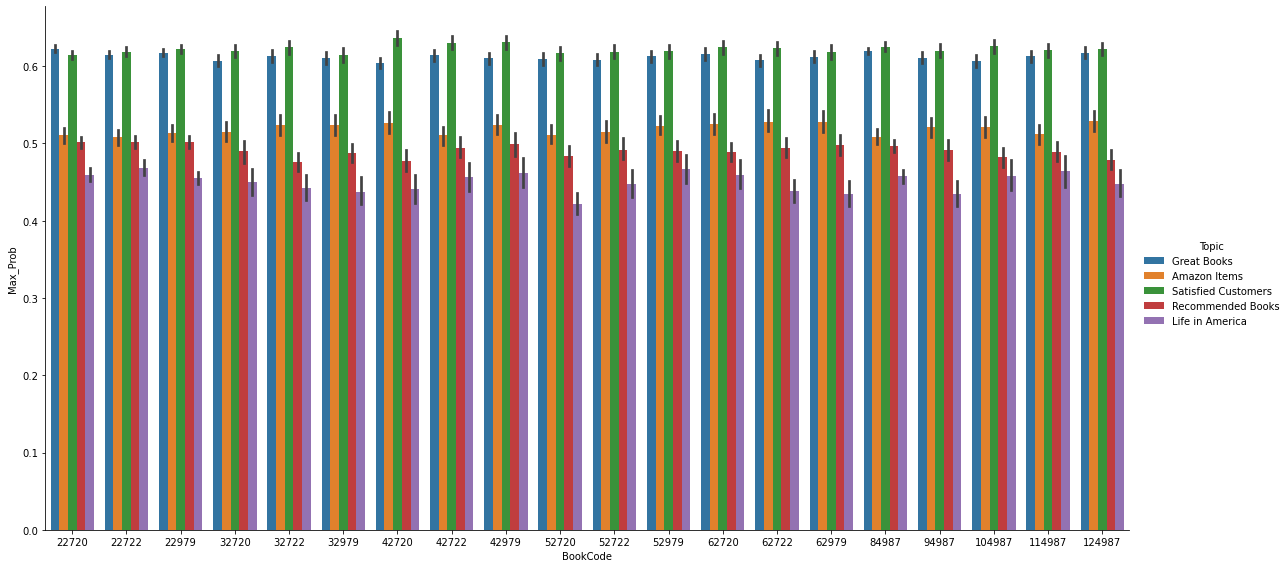

In [365]:
plt.figure(figsize=(24,18))
sns.catplot(x= 'BookCode',y= 'Max_Prob', hue='Topic', data=reviews_unique,kind='bar',aspect=2, height = 8)
plt.savefig('Topic_Chart.jpg')

In [405]:
reviews_final.head()

BookCode                                         clean_text
0     52979  self publish book want know whi read paragraph...
1     22722  wa dissapoint see error back cover sinc paid b...
2     52720  complet wast time typograph error poor grammar...
3     32722  feel write keep wast money book seem written g...
4     84987  excel stock long shift foot not tight not loos...

## Latent Semantic Analysis

In [367]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(data_vectorized)

len(svd_model.components_)

20

In [368]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
book
 
read
 
good
 
veri
 
stori
 
think
 
time
 
Topic 1: 
read
 
veri
 
good
 
stori
 
time
 
work
 
great
 
Topic 2: 
veri
 
good
 
book
 
work
 
great
 
look
 
realli
 
Topic 3: 
veri
 
read
 
easi
 
book
 
disappoint
 
inform
 
difficult
 
Topic 4: 
good
 
read
 
album
 
song
 
price
 
pretti
 
look
 
Topic 5: 
good
 
stori
 
veri
 
charact
 
write
 
novel
 
plot
 
Topic 6: 
great
 
love
 
think
 
realli
 
album
 
song
 
read
 
Topic 7: 
great
 
work
 
time
 
stori
 
good
 
book
 
year
 
Topic 8: 
love
 
time
 
album
 
great
 
song
 
realli
 
veri
 
Topic 9: 
write
 
charact
 
great
 
novel
 
author
 
album
 
plot
 
Topic 10: 
love
 
charact
 
work
 
year
 
realli
 
want
 
novel
 
Topic 11: 
realli
 
charact
 
seri
 
novel
 
plot
 
enjoy
 
great
 
Topic 12: 
realli
 
write
 
look
 
want
 
album
 
know
 
becaus
 
Topic 13: 
realli
 
work
 
album
 
write
 
love
 
time
 
song
 
Topic 14: 
album
 
song
 
life
 
know
 
peopl
 
becaus
 
want
 
Topic 15: 
album
 
song
 
seri
 

In [403]:
import umap
from sklearn.datasets import load_digits

X_topics = svd_model.fit_transform(data_vectorized)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

AttributeError: module 'umap' has no attribute 'UMAP'

In [404]:
import umap
reducer = umap.UMAP()

AttributeError: module 'umap' has no attribute 'UMAP'

In [391]:
import numba
from numba.core import types
from numba.experimental import structref
# !pip3 install numba

ImportError: cannot import name 'structref' from 'numba.experimental' (C:\Users\DuttaAnn\Anaconda3\lib\site-packages\numba\experimental\__init__.py)